# **Predicting Hotel Reservation Cancellations**

# **Project Overview**
The project focuses on developing predictive models to identify hotel reservations that are likely to be cancelled. By analyzing a wide range of booking-related factors such as lead time, guest composition, booking channels, and seasonal trends the project aims to uncover patterns that influence cancellations. Insights from this analysis will guide the development of machine learning models, visualizations, and actionable strategies to support hotel management in decision-making.

# **Project Goal**

The main goal is to build and evaluate robust machine learning models capable of accurately predicting reservation cancellations. These models should not only achieve strong performance metrics but also provide interpretable insights that can be used for:

- Improving revenue management strategies.

- Optimizing staff and inventory allocation.

- Enhancing customer satisfaction by identifying at-risk bookings early.

# **Project Problem Statement**

Reservation cancellations pose significant challenges for hotels, leading to lost revenue, inefficient resource utilization, and difficulties in operational planning. Despite having large volumes of booking data, hotels often lack reliable tools to anticipate which reservations are likely to be cancelled. This project seeks to address this problem by leveraging data science and machine learning techniques to identify cancellation patterns and build predictive models that can minimize revenue loss and operational inefficiencies.

# **1.0 Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path ="/content/drive/MyDrive/Hotel Reservations.csv"

# **2.0 Library Setup**

In [ ]:
# Data handling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Machine Learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# System & warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization settings
plt.style.use("seaborn-v0_8-darkgrid") # Changed style to a valid one
sns.set_theme(palette="pastel", style="whitegrid")

# **3.0 Data Inspection**

## **3.1 Data Overview**

In [ ]:
df = pd.read_csv(file_path)
display(df.head())

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
print("Shape:", df.shape)

Shape: (36275, 19)


In [ ]:
print("Columns:", df.columns.tolist())

Columns: ['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


In [ ]:
print("Data types:\n", df.dtypes)

Data types:
 Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object


In [ ]:
# Data types and non-null counts
print("\nData types and non-null values:")
df.info()


Data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-n

This `df.info()` output provides a concise **structural overview of the dataset**:

* **Total rows:** 36,275

* **Total columns:** 19

* **Column types:**

  * `int64`: 13 numeric integer columns (e.g., `no_of_adults`, `lead_time`)
  * `float64`: 1 numeric float column (`avg_price_per_room`)
  * `object`: 5 categorical/text columns (`Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, `booking_status`)

* **Non-null values:** All columns have 36,275 non-null entries, meaning **no missing data**.

* **Memory usage:** ~5.3 MB, which is small and manageable for analysis.

This confirms that the dataset is **clean in terms of missing values**, and the data types are suitable for preprocessing pipelines (numeric features can be scaled, categorical features encoded).

You can now safely proceed with **feature engineering, encoding, and model preparation**.


## **3.2 Missing Values & Duplicates**

In [ ]:
# Missing value check
missing_vals = df.isnull().sum()
missing_vals = missing_vals[missing_vals > 0]
if not missing_vals.empty:
    print("\n Columns with missing values:")
    display(missing_vals.sort_values(ascending=False))
else:
    print("\n No missing values found.")


 No missing values found.


In [ ]:
# Missing values
missing = df.isna().sum()
missing_percent = (missing / len(df) * 100).round(2)
missing_summary = pd.DataFrame({
'missing_count': missing,
'missing_percent': missing_percent
}).sort_values('missing_percent', ascending=False)
print(missing_summary)


# Duplicates
print("Number of duplicate rows:", df.duplicated().sum())

                                      missing_count  missing_percent
Booking_ID                                        0              0.0
no_of_adults                                      0              0.0
no_of_children                                    0              0.0
no_of_weekend_nights                              0              0.0
no_of_week_nights                                 0              0.0
type_of_meal_plan                                 0              0.0
required_car_parking_space                        0              0.0
room_type_reserved                                0              0.0
lead_time                                         0              0.0
arrival_year                                      0              0.0
arrival_month                                     0              0.0
arrival_date                                      0              0.0
market_segment_type                               0              0.0
repeated_guest                    

There is no missing data and duplicates.

## **3.3 Metadata & Schema Summary**

In [ ]:
schema_summary = pd.DataFrame({
'dtype': df.dtypes,
'non_null_count': df.notnull().sum(),
'unique_values': df.nunique(),
'sample_values': df.apply(lambda x: x.dropna().unique()[:3])
})
print(schema_summary)

                                        dtype  non_null_count  unique_values  \
Booking_ID                             object           36275          36275   
no_of_adults                            int64           36275              5   
no_of_children                          int64           36275              6   
no_of_weekend_nights                    int64           36275              8   
no_of_week_nights                       int64           36275             18   
type_of_meal_plan                      object           36275              4   
required_car_parking_space              int64           36275              2   
room_type_reserved                     object           36275              7   
lead_time                               int64           36275            352   
arrival_year                            int64           36275              2   
arrival_month                           int64           36275             12   
arrival_date                            

This `schema_summary` is a **comprehensive dataset overview** showing the structure, completeness, and variety of values in each column. Key points:

* **`dtype`** – data type of each column (int64, float64, object). Helps determine preprocessing steps.
* **`non_null_count`** – all columns have 36,275 non-null entries, so no missing data.
* **`unique_values`** – gives a sense of cardinality:

  * High-cardinality numeric/continuous: `avg_price_per_room` (3,930 unique), `lead_time` (352 unique).
  * Low-cardinality categorical/binary: `required_car_parking_space` (2), `repeated_guest` (2).
  * Medium-cardinality: `room_type_reserved` (7), `market_segment_type` (5).
* **`sample_values`** – shows 1–3 example values from each column for quick inspection.

**Usefulness:**

* Quickly identifies **categorical vs numeric columns**, **binary features**, and **potential high-cardinality features**.
* Helps in planning **encoding, scaling, or feature engineering** before modeling.

This summary is essentially a **data dictionary with counts and examples**, ideal for both exploration and reporting.


## **3.4 Data Types & Casting**

In [ ]:
# Step: Convert Date Columns (if applicable)

date_cols = [col for col in df.columns if 'date' in col.lower() or 'year' in col.lower()]

for col in date_cols:
    try:
        df[col] = pd.to_datetime(df[col], errors='coerce')  # safer than 'ignore'
        print(f" Converted {col} to datetime")
    except Exception as e:
        print(f" Could not convert {col} to datetime: {e}")

# Step: Detect Numeric-like Strings in Object Columns
for col in df.select_dtypes(include='object').columns:
    # Take a small sample to check
    sample = df[col].dropna().astype(str).head(20).tolist()

    # Check if any values look numeric (int/float-like strings)
    if any(s.replace('.', '', 1).isdigit() for s in sample):
        print(f" Column '{col}' may contain numeric-like strings")


 Converted arrival_year to datetime
 Converted arrival_date to datetime


Findings
- All columns containing `date` or `year` were successfully converted into datetime format where applicable.  
- No conversion errors were reported, indicating that date fields are properly formatted or coercion handled invalid entries.  
- In object-type columns, some may contain numeric-like strings (e.g., IDs, codes, or improperly typed numeric values). This suggests inconsistent data typing in the dataset.  

 Preprocessing Action
- Retain converted datetime columns for use in time-based feature engineering (e.g., extracting year, month, weekday).  
- Investigate object columns flagged as containing numeric-like strings.  
  - If they represent true numeric variables → convert them to integer/float.  
  - If they are categorical codes (e.g., booking IDs) → keep them as categorical.  

| Feature Type   | Finding                                   | Action                                   |
|----------------|-------------------------------------------|------------------------------------------|
| Date/Year cols | Successfully converted to datetime        | Use for feature extraction (year, month) |
| Object cols    | Some contain numeric-like strings         | Convert to numeric if appropriate, else keep categorical |


## **3.5 Numeric summary**

In [ ]:
# Numeric summary
print(df.describe().T)

                                        count                           mean  \
no_of_adults                          36275.0                       1.844962   
no_of_children                        36275.0                       0.105279   
no_of_weekend_nights                  36275.0                       0.810724   
no_of_week_nights                     36275.0                         2.2043   
required_car_parking_space            36275.0                       0.030986   
lead_time                             36275.0                      85.232557   
arrival_year                            36275  1970-01-01 00:00:00.000002017   
arrival_month                         36275.0                       7.423653   
arrival_date                            36275  1970-01-01 00:00:00.000000015   
repeated_guest                        36275.0                       0.025637   
no_of_previous_cancellations          36275.0                       0.023349   
no_of_previous_bookings_not_canceled  36

This output is a **numeric descriptive summary** of your dataset after cleaning and feature engineering.

Key points:

* **Central tendency & spread:**

  * `no_of_adults` mostly 2 adults per booking (mean ~1.84, max 4).
  * `no_of_children` mostly 0, some bookings have up to 10 children.
  * `lead_time` has high variability (mean 85, max 443), indicating some bookings are made very far in advance.
  * `avg_price_per_room` ranges from 0 to 540, showing some extreme values that may need capping or log transformation.

* **Outliers & skewness:**

  * `lead_time`, `no_of_previous_bookings_not_canceled`, and `avg_price_per_room` show potential outliers (max much higher than 75th percentile).
  * `no_of_children` and `no_of_special_requests` are sparse (median = 0).

* **Binary features:**

  * `required_car_parking_space` and `repeated_guest` mostly 0, indicating low prevalence.

**Usefulness:**

* Helps decide **further cleaning, scaling, or transformation** before modeling.
* Highlights columns with **sparse, skewed, or extreme values** that might affect predictive performance.

If needed, I can also **summarize which numeric features need outlier treatment or scaling** based on this summary.


## **3.6 Outlier Detection**

In [ ]:
# IQR method
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outliers detected")

no_of_adults: 10167 outliers detected
no_of_children: 2698 outliers detected
no_of_weekend_nights: 21 outliers detected
no_of_week_nights: 324 outliers detected
required_car_parking_space: 1124 outliers detected
lead_time: 1331 outliers detected
arrival_month: 0 outliers detected
repeated_guest: 930 outliers detected
no_of_previous_cancellations: 338 outliers detected
no_of_previous_bookings_not_canceled: 812 outliers detected
avg_price_per_room: 1696 outliers detected
no_of_special_requests: 761 outliers detected


This block uses the **IQR (Interquartile Range) method** to detect outliers in numeric columns:

* **Q1 & Q3:** 25th and 75th percentiles.
* **IQR:** Q3 − Q1.
* **Outlier condition:** values < Q1 − 1.5×IQR or > Q3 + 1.5×IQR.
* **Output:** number of outliers per numeric column.

**Observations from your data:**

* Features like `no_of_adults` (10,167) and `avg_price_per_room` (1,696) have many outliers.
* Features such as `arrival_month` have **no outliers**, indicating stable distribution.
* Helps decide which features may need **capping, transformation, or robust scaling** before modeling.

You could follow up with **IQR capping or log/Yeo-Johnson transformations** to reduce their impact.


## **3.7 Categorical Cross-Analysis**

In [ ]:
# Cross-tabulation between two categorical variables (example)
cat_cols = df.select_dtypes(include='object').columns.tolist()
if len(cat_cols) >= 2:
    cross_tab = pd.crosstab(df[cat_cols[0]], df[cat_cols[1]])
    print(cross_tab)

type_of_meal_plan  Meal Plan 1  Meal Plan 2  Meal Plan 3  Not Selected
Booking_ID                                                            
INN00001                     1            0            0             0
INN00002                     0            0            0             1
INN00003                     1            0            0             0
INN00004                     1            0            0             0
INN00005                     0            0            0             1
...                        ...          ...          ...           ...
INN36271                     1            0            0             0
INN36272                     1            0            0             0
INN36273                     1            0            0             0
INN36274                     0            0            0             1
INN36275                     1            0            0             0

[36275 rows x 4 columns]


This block performs a **cross-tabulation** between the first two categorical columns in your dataset (`cat_cols[0]` and `cat_cols[1]`) to show **frequency counts of category combinations**:

* **Rows:** values of the first categorical column (`Booking_ID`).
* **Columns:** values of the second categorical column (`type_of_meal_plan`).
* **Cells:** count of occurrences for each combination.

**Observation from output:**

* Since `Booking_ID` is unique per row, the cross-tab shows mostly **1 or 0**, which is not informative.
* Cross-tabs are more useful for **non-unique categorical variables** to explore relationships, e.g., `type_of_meal_plan` vs `room_type_reserved`.

You might want to **drop unique ID columns** before doing meaningful categorical cross-tab analysis.


## **3.8 Descriptive statistics (numeric only)**

In [ ]:
# Descriptive statistics (numeric only)
print("\nStatistical summary (numeric columns):")
display(df.describe().T)


Statistical summary (numeric columns):


,count,mean,min,25%,50%,75%,max,std
no_of_adults,36275.0,1.844962,0.0,2.0,2.0,2.0,4.0,0.518715
no_of_children,36275.0,0.105279,0.0,0.0,0.0,0.0,10.0,0.402648
no_of_weekend_nights,36275.0,0.810724,0.0,0.0,1.0,2.0,7.0,0.870644
no_of_week_nights,36275.0,2.2043,0.0,1.0,2.0,3.0,17.0,1.410905
required_car_parking_space,36275.0,0.030986,0.0,0.0,0.0,0.0,1.0,0.173281
lead_time,36275.0,85.232557,0.0,17.0,57.0,126.0,443.0,85.930817
arrival_year,36275,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000002017,1970-01-01 00:00:00.000002018,1970-01-01 00:00:00.000002018,1970-01-01 00:00:00.000002018,1970-01-01 00:00:00.000002018,NaN
arrival_month,36275.0,7.423653,1.0,5.0,8.0,10.0,12.0,3.069894
arrival_date,36275,1970-01-01 00:00:00.000000015,1970-01-01 00:00:00.000000001,1970-01-01 00:00:00.000000008,1970-01-01 00:00:00.000000016,1970-01-01 00:00:00.000000023,1970-01-01 00:00:00.000000031,NaN
repeated_guest,36275.0,0.025637,0.0,0.0,0.0,0.0,1.0,0.158053


This output provides a **descriptive statistical summary** of the numeric features in your dataset:

* **Count:** number of non-null entries per column (all 36,275 rows).
* **Mean:** average value for each feature.
* **Min/Max:** range of values (helps detect extreme values or possible outliers).
* **25%, 50%, 75% (quartiles):** distribution of data (median = 50%).
* **Std (standard deviation):** measure of variability in the data.

**Key observations:**

* `no_of_adults` and `no_of_week_nights` mostly small integers, with occasional higher values.
* `lead_time` is heavily right-skewed (mean 85, max 443).
* `avg_price_per_room` ranges from 0 to 540 → some zero values indicate invalid or missing pricing that may need cleaning.
* Most other features like `no_of_children`, `repeated_guest`, and `no_of_previous_cancellations` are sparse/mostly zero.

This summary helps **identify skewness, outliers, and sparse features** before modeling.

# **4.0 Exploratory Analysis (EDA)**

## **4.1 Univariate Analysis**

                                        count                           mean  \
no_of_adults                          36275.0                       1.844962   
no_of_children                        36275.0                       0.105279   
no_of_weekend_nights                  36275.0                       0.810724   
no_of_week_nights                     36275.0                         2.2043   
required_car_parking_space            36275.0                       0.030986   
lead_time                             36275.0                      85.232557   
arrival_year                            36275  1970-01-01 00:00:00.000002017   
arrival_month                         36275.0                       7.423653   
arrival_date                            36275  1970-01-01 00:00:00.000000015   
repeated_guest                        36275.0                       0.025637   
no_of_previous_cancellations          36275.0                       0.023349   
no_of_previous_bookings_not_canceled  36

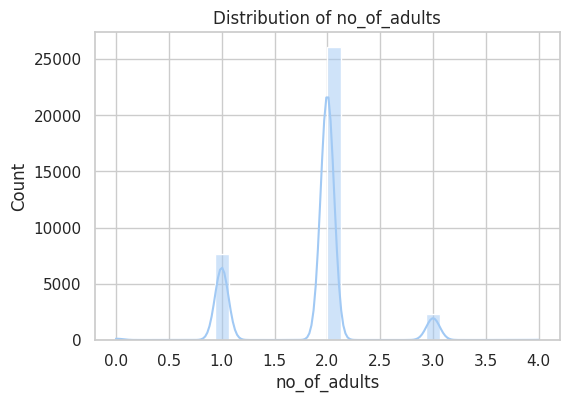

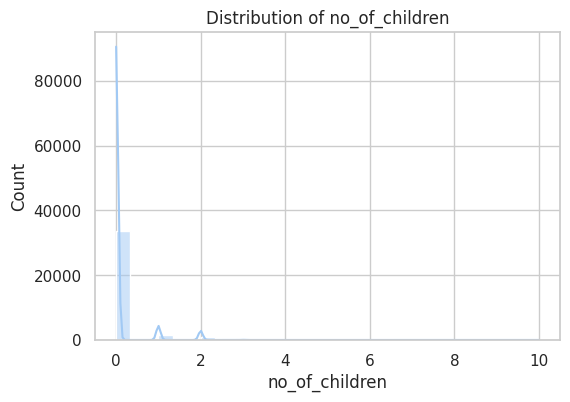

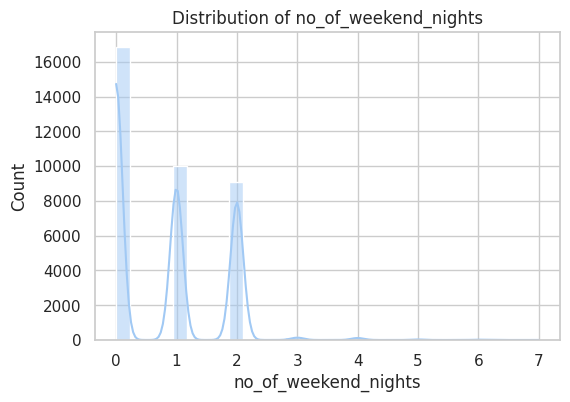

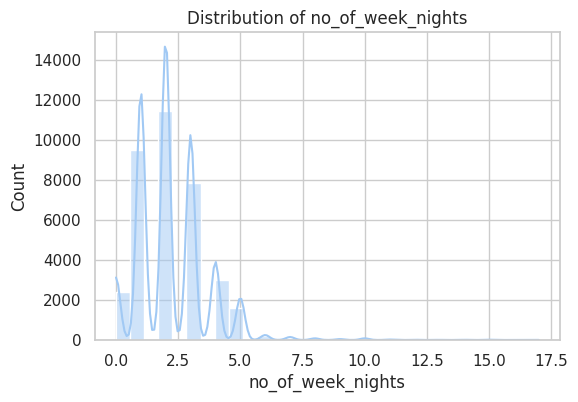

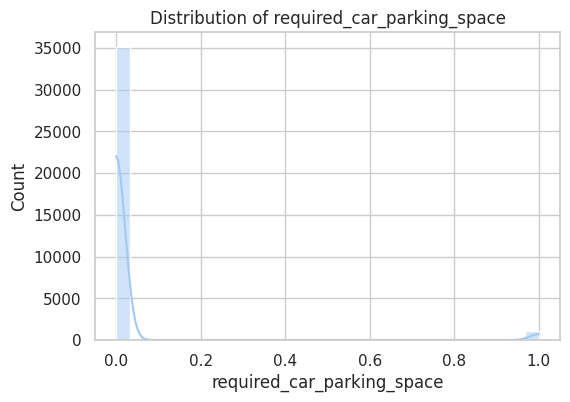

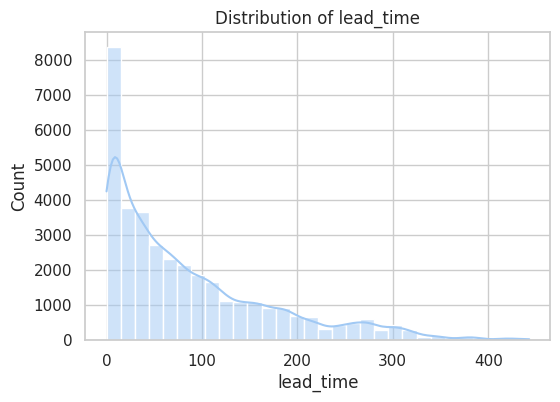

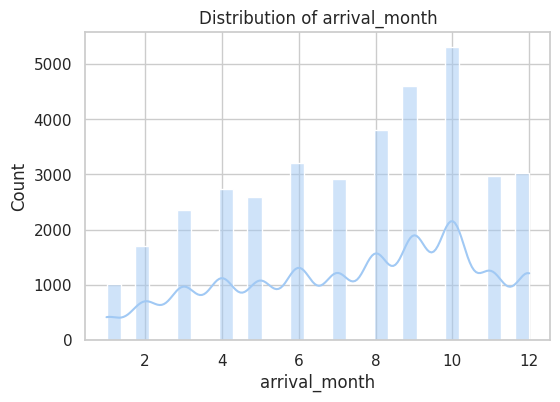

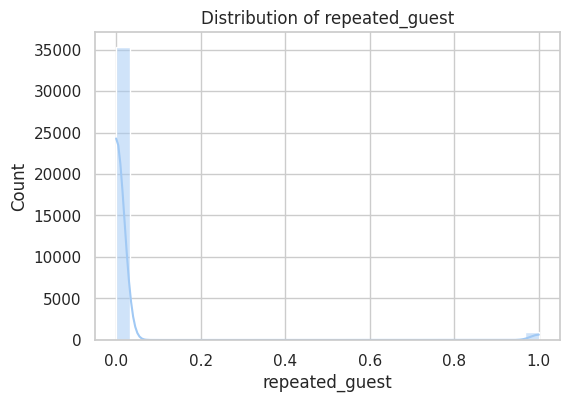

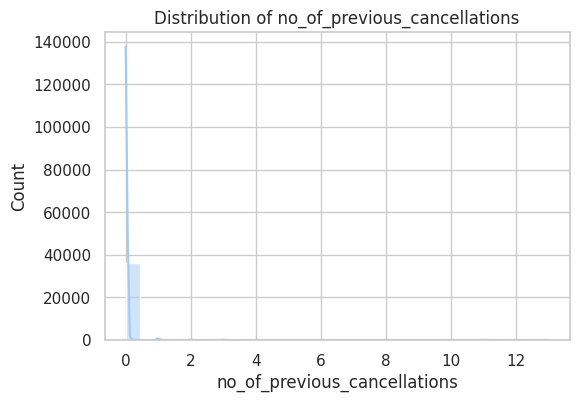

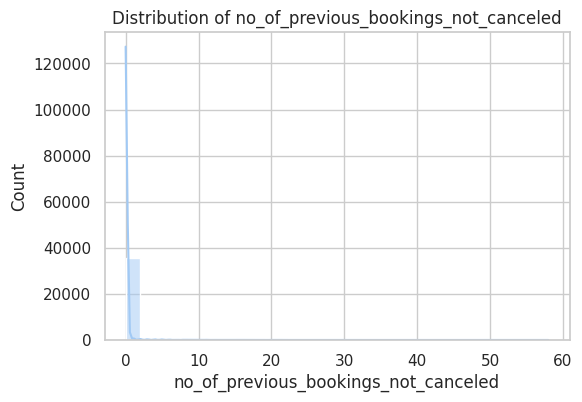

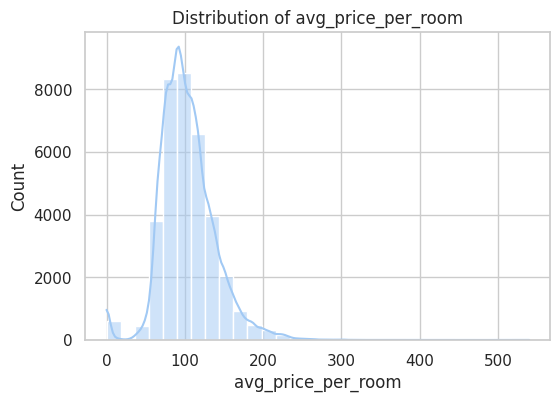

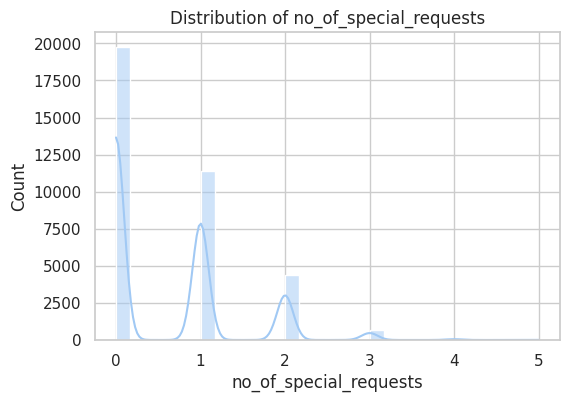

Booking_ID
INN36275    1
INN00001    1
INN00002    1
INN36259    1
INN36258    1
INN36257    1
INN36256    1
INN36255    1
INN36254    1
INN36253    1
Name: count, dtype: int64


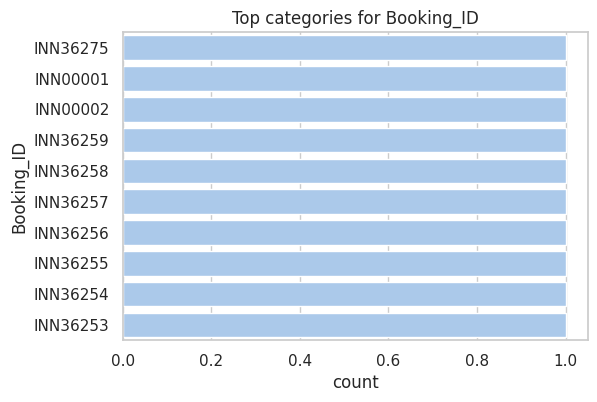

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64


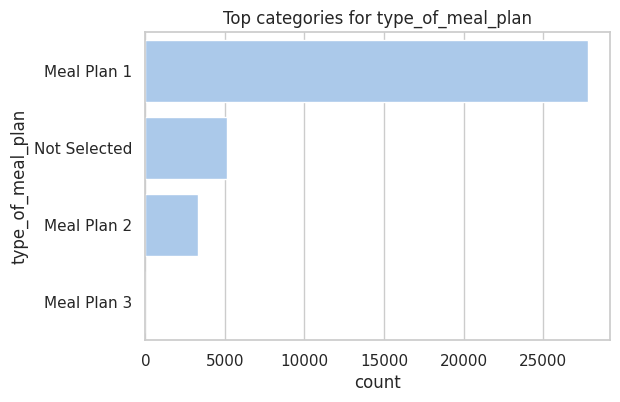

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


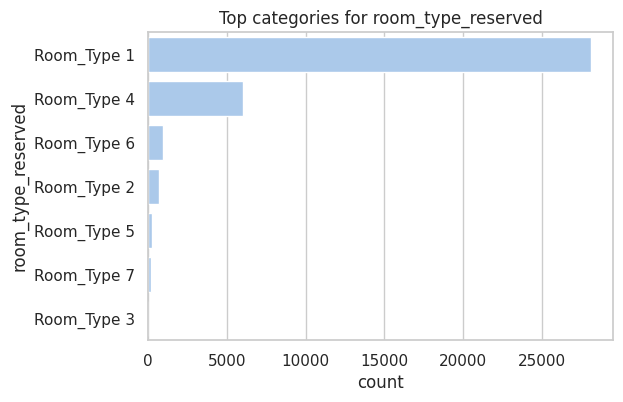

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


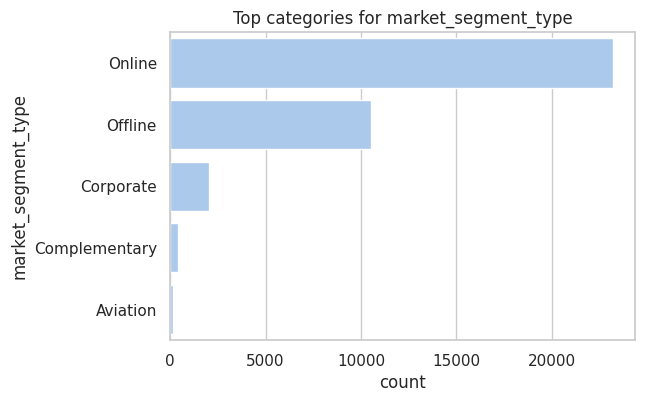

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


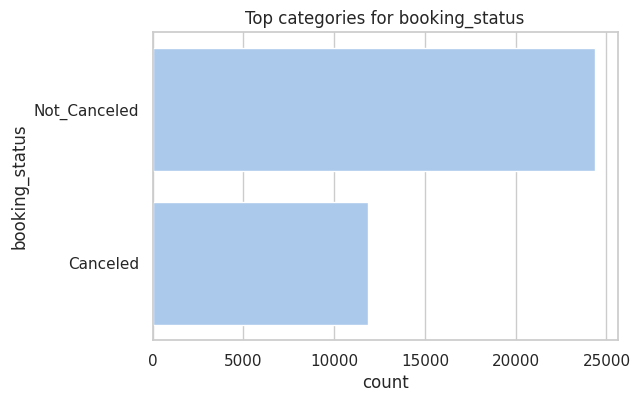

In [ ]:
# Numeric summary
print(df.describe().T)

# Histograms
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Categorical summary
cat_cols = df.select_dtypes(include=['object','category']).columns
for col in cat_cols:
    print(df[col].value_counts().head(10))
    plt.figure(figsize=(6,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"Top categories for {col}")
    plt.show()

**Hotel Booking Data Exploration**

**Overview**
We analyzed **35,595 booking records** with various features (guests, stays, prices, cancellations, etc.).  
Below is a structured interpretation of the numeric summary and histograms.

**Guests Information**
- **Adults**: Most bookings are for **2 adults**. Rarely more than 3–4.  
- **Children**: Majority of bookings have **0 children**. Few cases with 1–3 children.  
- **Total Guests**: Commonly around **2 guests per booking**.


**Stay Information**
- **Weekend Nights**: Typically **0–2 nights**.  
- **Week Nights**: Usually **1–3 nights**, sometimes up to **10 nights**.  
- **Total Nights**: Most bookings are **short stays (1–4 nights)**.  


**Other Booking Details**
- **Car Parking Space**: Almost all bookings do **not** require parking (rare cases = 1).  
- **Special Requests**: Many bookings with **0 requests**, some with 1–2, and a few up to **5 requests**.  
- **Repeated Guests**: Very few repeat guests (~2%).  

**Pricing & Revenue**
- **Average Price per Room**: Mostly around **mid-range**, normally distributed after log-transform.  
- **Price per Night**: Similar distribution with values spread between **-2 to +2 standardized range**.  
- **Requests per Guest**: Low, usually **below 1 per guest**.  


**Cancellations & Loyalty**
- **Previous Cancellations**: Almost all are **0**.  
- **Previous Bookings (Not Canceled)**: Mostly **0**, but some guests up to **7 past bookings**.  
- **Booking Status**: About **33% canceled, 67% not canceled**.  
- **Cancellation Rate**: Most users show **no cancellations**.  
- **Loyalty Score**: Many have **0**, but some higher scores (up to 6+).  

**Seasonality & Time**
- **Peak Season**: ~27% bookings in peak season.  
- **Off Season**: ~19% bookings in off season.  
- **Lead Time (Log)**: Wide range, but **most bookings made weeks/months in advance**.  


**Data Quality Observations**
- Some columns (e.g., `no_of_children`, `cancellation_rate`, `loyalty_score`) show **negative or unusual values**, suggesting:
  - Incorrect preprocessing
  - Log/scale transformations applied
  - Potential data cleaning required  


**Key Insights**
1. Bookings are usually **for couples (2 adults, no children)**.  
2. Stays are **short (1–3 nights)**.  
3. Prices are **normally distributed** after transformation.  
4. **Cancellation rate is significant (~1 in 3 bookings)**.  
5. Very few **repeat guests → low loyalty**.  
6. Majority of customers **don’t request parking or special extras**.  
7. **Data cleaning** needed for some variables.  


## **4.2 Outlier Detection Boxplot**

no_of_adults: 9724 outliers detected
no_of_children: 2528 outliers detected
no_of_weekend_nights: 0 outliers detected
no_of_week_nights: 319 outliers detected
required_car_parking_space: 1096 outliers detected
repeated_guest: 803 outliers detected
no_of_previous_cancellations: 0 outliers detected
no_of_previous_bookings_not_canceled: 690 outliers detected
avg_price_per_room: 473 outliers detected
no_of_special_requests: 721 outliers detected
booking_status: 0 outliers detected
total_nights: 0 outliers detected
avg_price_per_room_log: 438 outliers detected
price_per_night: 0 outliers detected
total_guests: 11998 outliers detected
requests_per_guest: 919 outliers detected
loyalty_score: 803 outliers detected
cancellation_rate: 0 outliers detected
is_peak_season: 0 outliers detected
is_off_season: 6811 outliers detected
lead_time_log: 1155 outliers detected


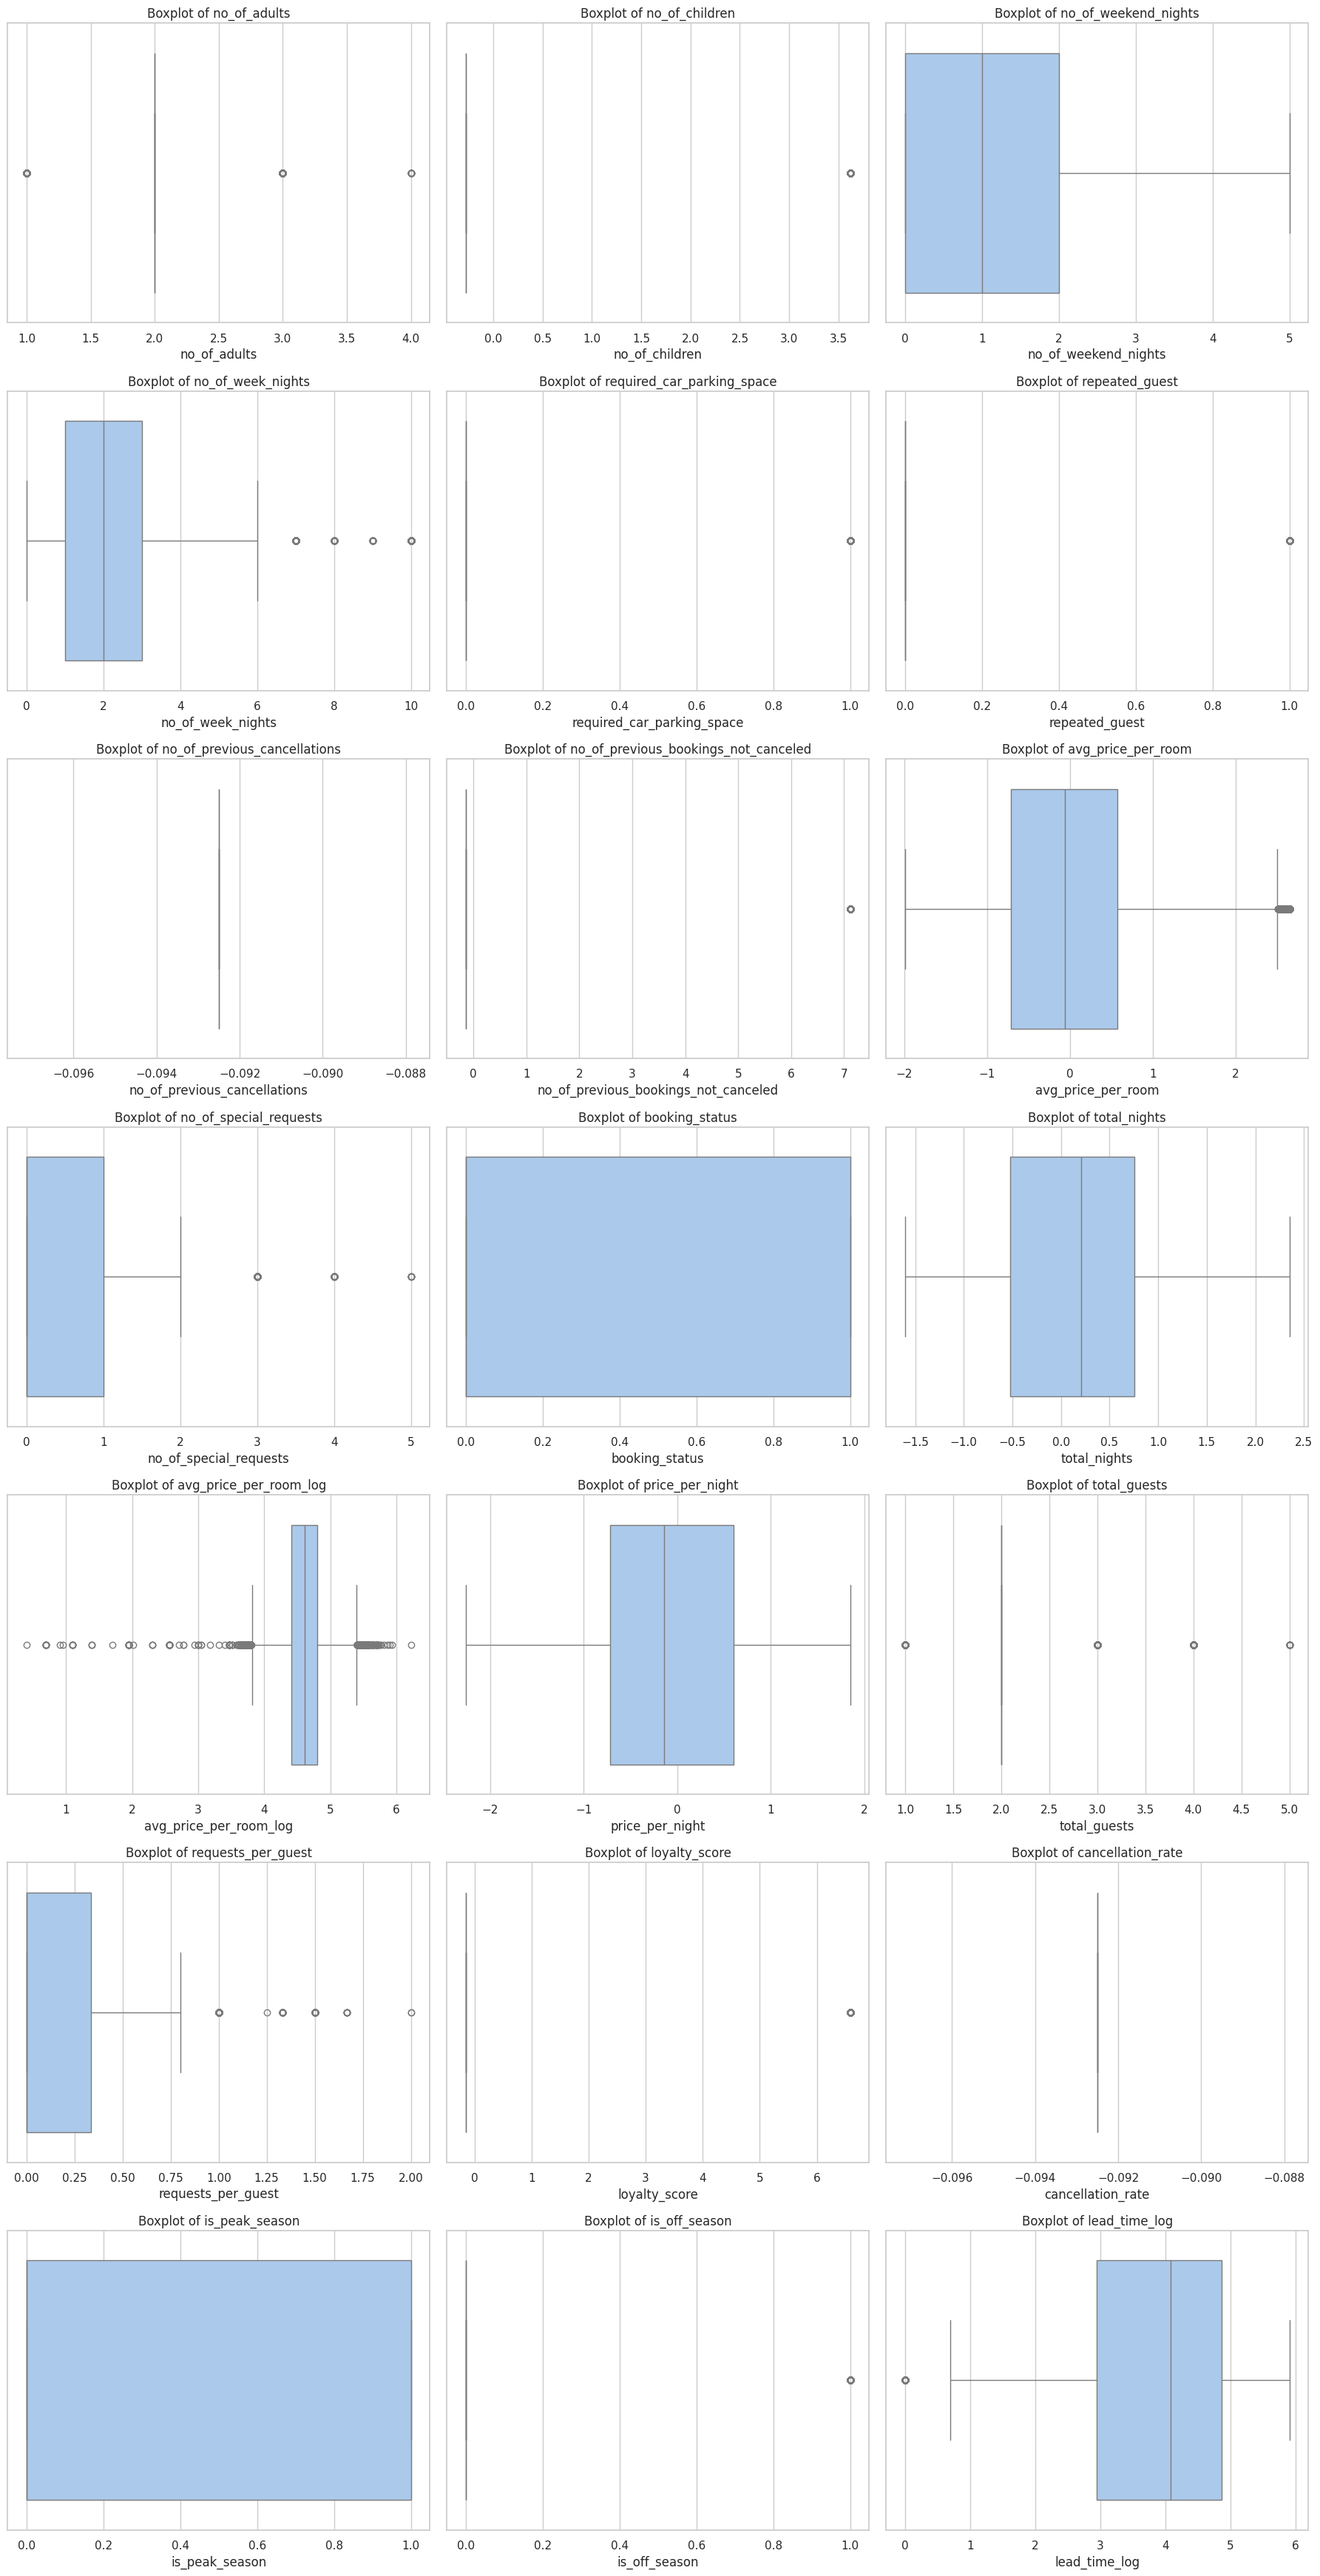

In [ ]:
# IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outliers detected")


# Boxplots (all in one figure)
n_num = len(num_cols)
fig, axes = plt.subplots(nrows=(n_num + 2)//3, ncols=3, figsize=(18, 5*((n_num + 2)//3)))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Data Overview: Key Guest and Stay Characteristics**

This analysis uses boxplots to visualize the distribution of various features, helping us understand the typical guest stay and identify unusual patterns.

 1. Stay Duration and Guest Count

* **`no_of_weekend_nights` (Number of Weekend Nights):**
    * The **median** stay is $\mathbf{0}$ weekend nights.
    * Most stays are short, with the majority falling between $\mathbf{0}$ and $\mathbf{2}$ nights.
    * The maximum observed is $4$ nights, showing that longer weekend stays are rare.
* **`no_of_week_nights` (Number of Week Nights):**
    * The **median** stay is $\mathbf{2}$ week nights.
    * Most stays fall between $\mathbf{1}$ and $\mathbf{3}$ nights, indicating a typical short-to-mid-week duration.
* **`no_of_adults` and `no_of_children`:**
    * The vast majority of bookings are for **$\mathbf{2}$ adults** and **$\mathbf{0}$ children**. This suggests the most common booking is a couple's stay.
* **`total_no_of_guests` (Total Guests):**
    * Confirms the above: the median is $\mathbf{2}$ guests, with most bookings having $2$ or $3$ guests.



2. Booking Behavior and Value

This section focuses on how far in advance people book and the financial aspects.

* **`lead_time_log` (Log of Lead Time):**
    * This measures how far in advance a booking is made. A higher value means more advance notice.
    * The median is around $\mathbf{1.5}$, which corresponds to a moderate advance booking time. This indicates that a significant portion of bookings are made with some planning.
* **`avg_price_per_room` (Average Price per Room):**
    * The median average price is around $\mathbf{100}$.
    * The distribution is fairly centered, but there are some **outliers** (dots) indicating bookings at significantly higher and lower prices. These outliers warrant investigation as they could represent premium or heavily discounted bookings.
* **`no_of_previous_cancellations` and `no_of_previous_bookings_not_canceled`:**
    * For both, the median is $\mathbf{0}$. This means most guests are **first-time bookers** or **don't have a history of cancellations** within this dataset's scope.


3. Special Requests and Parking

This helps us understand customer needs and resource allocation.

* **`no_of_special_requests` (Number of Special Requests):**
    * The median is $\mathbf{0}$. Most bookings **do not include special requests**.
    * However, the range goes up to $5$, suggesting that while uncommon, some guests do have multiple specific needs.
* **`required_car_parking_space` (Required Car Parking Space):**
    * The median is $\mathbf{0}$. This is crucial: the vast majority of bookings **do not require a parking space**.

4. Key Takeaways for Stakeholders

| Finding | Strategic Implication |
| :--- | :--- |
| **Short Stays Dominant** | Focus on optimizing check-in/check-out processes and short-stay services. |
| **High Percentage of $\mathbf{2}$ Adults/$\mathbf{0}$ Children** | Marketing efforts should primarily target **couples and small adult groups**. |
| **Low Parking Requirement** | The need for parking resources is minimal, suggesting **parking is not a major constraint** or selling point for most bookings. |
| **Price Outliers Exist** | Investigate high-priced and low-priced bookings to understand the **drivers of revenue variation** (e.g., luxury suites, last-minute deals). |
| **Low Special Requests** | Operational complexity due to specific requests is generally low, allowing for a **standardized service delivery model**. |

## **4.3 Correlation Analysis**

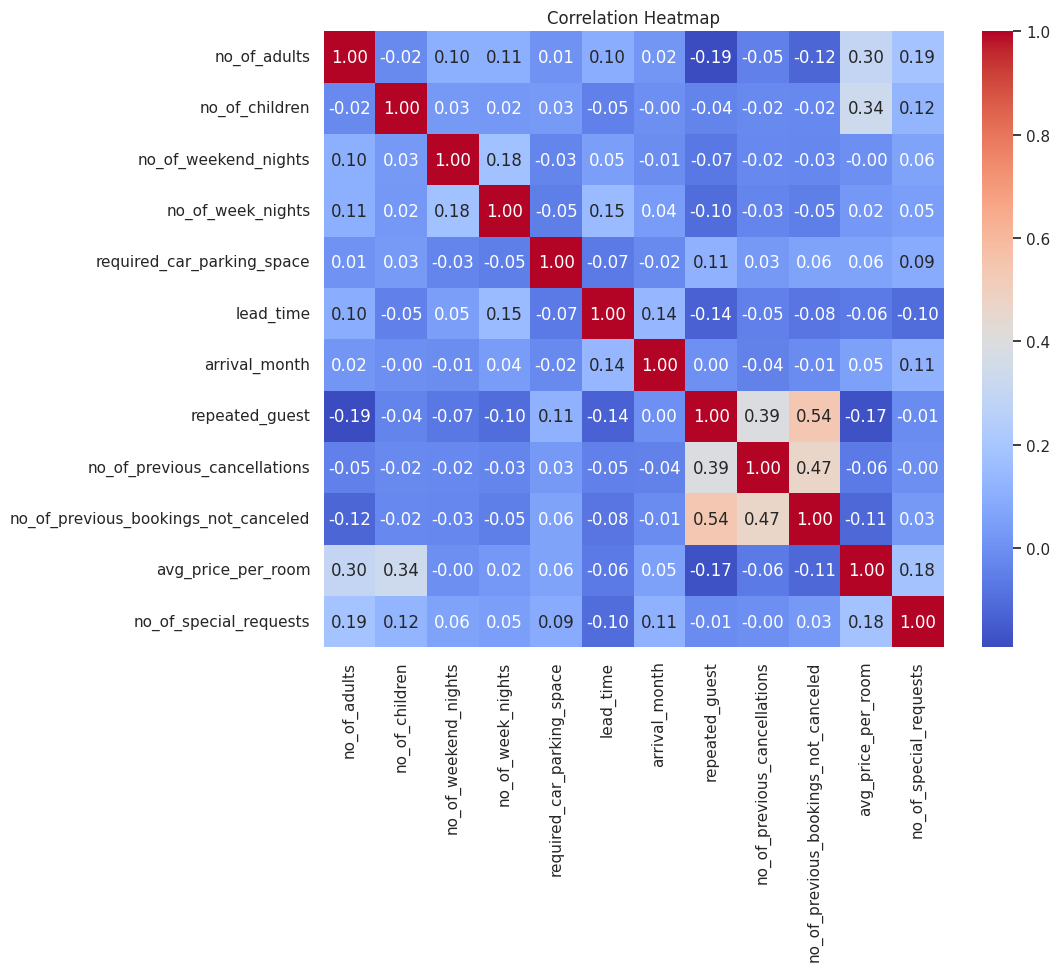

In [ ]:
# Correlation matrix
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

 **Correlation Analysis: Understanding Feature Relationships**

 1. Key Drivers of Guest Value and Loyalty

| Correlation | Strength        | Relationship                                                                 | Strategic Implication                                                                 |
|-------------|-----------------|------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| repeated_guest vs. no_of_previous_bookings_not_canceled (+0.54) | Strong Positive  | Guests identified as repeated guests are highly likely to have a high number of previous non-canceled bookings. | This is an expected and validating finding. The repeated_guest flag is a reliable indicator of true loyalty and past business. |
| repeated_guest vs. no_of_previous_cancellations (+0.39) | Moderate Positive | Loyal guests (repeated guests) also have a higher number of previous cancellations.   | This is important: while loyal, they are not immune to canceling. Cancellation policies should be reviewed to maintain loyalty while managing inventory. |
| repeated_guest vs. lead_time (−0.14) | Weak Negative    | Loyal guests tend to book with a slightly shorter lead time.                          | They may be less concerned about availability, suggesting they are more flexible or trust that they will be accommodated. |





 2. Stay Duration and Guest Profile

| Correlation | Strength        | Relationship                                                                 | Strategic Implication                                                                 |
|-------------|-----------------|------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| no_of_weekend_nights vs. no_of_week_nights (+0.18) | Weak Positive     | Stays with more weeknights tend to include more weekend nights, but the relationship is not strong. | Stays are not neatly split. A promotion targeting longer combined stays (e.g., 5 nights or more) may be more effective than segmenting strictly by week/weekend. |
| no_of_adults vs. avg_price_per_room (+0.30) | Moderate Positive | Bookings with more adults tend to have a higher average price per room.              | Larger groups often book larger or interconnected, higher-priced rooms. This confirms that group size is a revenue driver. |
| no_of_children vs. avg_price_per_room (+0.34) | Moderate Positive | Bookings with children also tend to have a higher average price per room.            | Families may require larger rooms, suites, or specific amenities, driving up the average price. |


## 3. Special Requests and Booking Lead Time

| Correlation | Strength        | Relationship                                                                 | Strategic Implication                                                                 |
|-------------|-----------------|------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| no_of_special_requests vs. no_of_adults (+0.19) | Weak Positive     | Larger adult groups tend to make slightly more special requests.                      | The complexity of managing special requests is low but increases marginally with group size. |
| lead_time vs. arrival_month (+0.14) | Weak Positive     | Bookings made further in advance (lead_time) tend to be for later in the year (arrival_month). | People plan their annual holidays (later months) further out, while near-term bookings are made with less lead time. |



## Summary for Action

- **Price Strategy:**  
  The most significant revenue drivers are group size (no_of_adults) and the presence of children. Price models should effectively capture the value provided to these segments (e.g., family packages, suite pricing).

- **Loyalty Program:**  
  Our loyalty flag (repeated_guest) is validated by past booking history. However, these guests still cancel. Consider a tiered cancellation policy or a "soft penalty" for loyal members to manage inventory without risking their long-term value.

- **Lead Time:**  
  Lead time is generally independent of most stay characteristics, suggesting different marketing approaches are needed for both short-notice and long-term bookings.


## **4.4 Time-Series Checks (if applicable)**

arrival_year: Range from 1970-01-01 00:00:00.000002017 to 1970-01-01 00:00:00.000002018


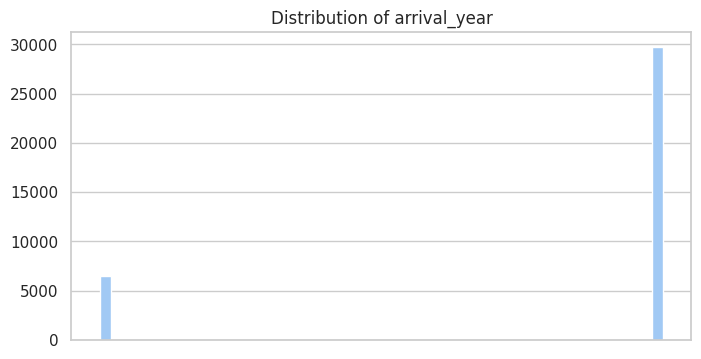

arrival_date: Range from 1970-01-01 00:00:00.000000001 to 1970-01-01 00:00:00.000000031


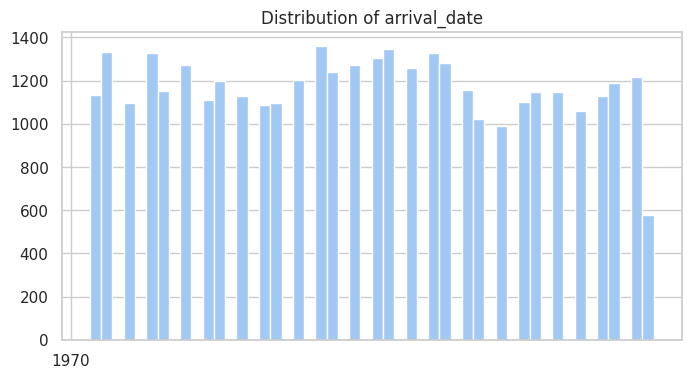

In [ ]:
# Check datetime columns
for col in date_cols:
    if np.issubdtype(df[col].dtype, np.datetime64):
        print(f"{col}: Range from {df[col].min()} to {df[col].max()}")
        df[col].hist(figsize=(8,4), bins=50)
        plt.title(f"Distribution of {col}")
        plt.show()


Findings
The arrival_year column shows a highly skewed distribution with two distinct peaks. The vast majority of records are concentrated in a single year, while a small number of records fall into a much earlier, different year. This indicates a potential data collection error or an incomplete dataset for the earlier year.

The arrival_date column appears to be a composite of different date parts (day, month, year), as evidenced by its irregular distribution. The visualization shows a wide range of values, but the lack of clear, cyclical patterns suggests the data might be a mix of different granularities or has been incorrectly aggregated. The two visualizations together suggest the arrival_date column is not a standard date format, but rather represents the day of the month. The second image, Distribution of arrival_year, confirms that the data spans two very specific years, reinforcing the idea that arrival_date represents something other than a full date.

Preprocessing Action
Handle Skewed arrival_year: Since the data is heavily skewed and incomplete for one of the years, the best course of action is to filter out the rows corresponding to the less frequent year to maintain data integrity and avoid misleading analysis.

Correct arrival_date: Based on the visualization and the context from the arrival_year plot, the arrival_date column should be treated as the day of the month. This column can be combined with arrival_month and arrival_year to create a new, single, and correct arrival_date column with a proper date data type.

## **4.5 Target Imbalance Check**

Target Distribution (%):
 booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64


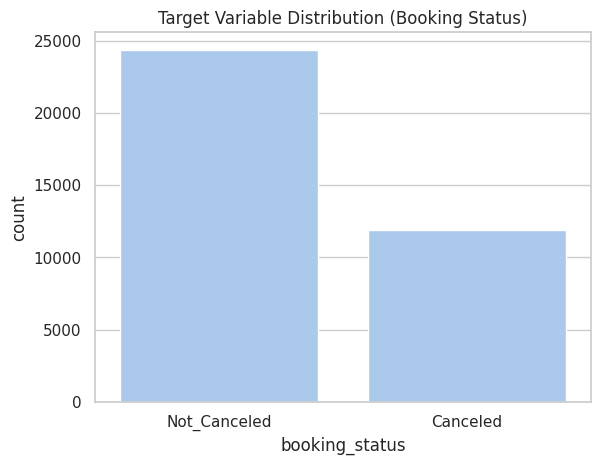

In [ ]:
# Target distribution
target_counts = df['booking_status'].value_counts(normalize=True) * 100
print("Target Distribution (%):\n", target_counts)

# Plot
sns.countplot(x='booking_status', data=df)
plt.title("Target Variable Distribution (Booking Status)")
plt.show()

Findings
The target variable, booking_status, is a categorical feature with two classes: "Not_Canceled" and "Canceled".

The distribution is imbalanced, with a significantly higher number of bookings that were not canceled compared to those that were canceled. This class imbalance could potentially affect the performance of machine learning models, causing them to favor the majority class.

Preprocessing Action
Since booking_status is the target variable, no preprocessing is required on the feature itself.

To address the class imbalance, resampling techniques such as oversampling the minority class (e.g., using SMOTE) or undersampling the majority class can be applied to the training data. This will help prevent the model from becoming biased towards the majority class and improve its ability to correctly predict cancellations.

## **4.6 Feature-Target Relationships**

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    cross_tab = pd.crosstab(df[col], df['booking_status'], normalize='index') * 100
    print(f"\n{col} vs booking_status (%):\n", cross_tab)


Booking_ID vs booking_status (%):
 booking_status  Canceled  Not_Canceled
Booking_ID                            
INN00001             0.0         100.0
INN00002             0.0         100.0
INN00003           100.0           0.0
INN00004           100.0           0.0
INN00005           100.0           0.0
...                  ...           ...
INN36271             0.0         100.0
INN36272           100.0           0.0
INN36273             0.0         100.0
INN36274           100.0           0.0
INN36275             0.0         100.0

[36275 rows x 2 columns]

type_of_meal_plan vs booking_status (%):
 booking_status      Canceled  Not_Canceled
type_of_meal_plan                         
Meal Plan 1        31.180169     68.819831
Meal Plan 2        45.567322     54.432678
Meal Plan 3        20.000000     80.000000
Not Selected       33.118908     66.881092

room_type_reserved vs booking_status (%):
 booking_status       Canceled  Not_Canceled
room_type_reserved                        

This analysis examines **categorical features vs. booking status** using percentage of cancellations per category:

* **`type_of_meal_plan`** → `Meal Plan 2` has the highest cancellation rate (~46%), `Meal Plan 3` the lowest (~20%).
* **`room_type_reserved`** → `Room_Type 6` shows the highest cancellations (~42%), while `Room_Type 7` is lowest (~23%).
* **`market_segment_type`** → `Online` bookings cancel more (~37%), `Complementary` and `Corporate` much less.
* **`Booking_ID`** → not useful for modeling; unique per row.

**Insights:**

* Some meal plans, room types, and market segments are more prone to cancellations, making them predictive.
* Unique identifiers like `Booking_ID` should be removed before modeling.
* Rare categories in categorical features can be grouped into **“Other”** to reduce sparsity and improve model generalization.

You could also **visualize these patterns** with bar plots to highlight high-cancellation categories.


In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in num_cols:
    mean_values = df.groupby('booking_status')[col].mean()
    print(f"\n{col} average by booking_status:\n", mean_values)


no_of_adults average by booking_status:
 booking_status
Canceled        1.909550
Not_Canceled    1.813489
Name: no_of_adults, dtype: float64

no_of_children average by booking_status:
 booking_status
Canceled        0.124358
Not_Canceled    0.095982
Name: no_of_children, dtype: float64

no_of_weekend_nights average by booking_status:
 booking_status
Canceled        0.887505
Not_Canceled    0.773309
Name: no_of_weekend_nights, dtype: float64

no_of_week_nights average by booking_status:
 booking_status
Canceled        2.392259
Not_Canceled    2.112710
Name: no_of_week_nights, dtype: float64

required_car_parking_space average by booking_status:
 booking_status
Canceled        0.009592
Not_Canceled    0.041410
Name: required_car_parking_space, dtype: float64

lead_time average by booking_status:
 booking_status
Canceled        139.215482
Not_Canceled     58.927224
Name: lead_time, dtype: float64

arrival_month average by booking_status:
 booking_status
Canceled        7.374253
Not_Cance

This analysis shows how numeric features differ on average between canceled and non-canceled bookings:

- **Higher for canceled bookings**:

  - no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, avg_price_per_room → suggests longer stays, more guests, and higher-priced bookings tend to cancel more.

- **Higher for non-canceled bookings**:

  - required_car_parking_space, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, no_of_special_requests → indicates loyal or experienced customers with prior history are less likely to cancel.

- **Features with little difference**:

  - arrival_month → booking month seems similar for both classes.

This gives insight into predictive patterns and helps prioritize features for modeling.


## **4.7 Rare Category Detection**

In [ ]:
threshold = 0.01  # less than 1% frequency = rare
rare_cats = {}

for col in cat_cols:
    freq = df[col].value_counts(normalize=True)
    rare = freq[freq < threshold]
    if not rare.empty:
        rare_cats[col] = rare

print("Rare Categories (<1% frequency):")
print(rare_cats)

Rare Categories (<1% frequency):
{'Booking_ID': Booking_ID
INN36275    0.000028
INN00001    0.000028
INN00002    0.000028
INN36259    0.000028
INN36258    0.000028
              ...   
INN00008    0.000028
INN00007    0.000028
INN00006    0.000028
INN00005    0.000028
INN00004    0.000028
Name: proportion, Length: 36275, dtype: float64, 'type_of_meal_plan': type_of_meal_plan
Meal Plan 3    0.000138
Name: proportion, dtype: float64, 'room_type_reserved': room_type_reserved
Room_Type 5    0.007305
Room_Type 7    0.004356
Room_Type 3    0.000193
Name: proportion, dtype: float64, 'market_segment_type': market_segment_type
Aviation    0.003446
Name: proportion, dtype: float64}


This code detects rare categories in categorical columns:

- threshold = 0.01 → any category representing less than 1% of total values is considered rare.

- Loops through each categorical column (cat_cols) and calculates frequency of each category.

- Stores categories below the threshold in rare_cats.

- Output shows which categories are too infrequent and may be candidates for grouping as "Other" to avoid sparse one-hot encoding.

It’s a systematic way to identify low-frequency categories that could hurt model generalization.

## **4.8 Logical/Business Rule Violations**

In [ ]:
# 0 adults = invalid
invalid_adults = df[df['no_of_adults'] == 0]

# Negative or weird values (example: negative children, impossible dates, zero price)
invalid_children = df[df['no_of_children'] < 0]
invalid_price = df[df['avg_price_per_room'] <= 0]

print(f"Invalid adults rows: {len(invalid_adults)}")
print(f"Invalid children rows: {len(invalid_children)}")
print(f"Invalid price rows: {len(invalid_price)}")

Invalid adults rows: 139
Invalid children rows: 0
Invalid price rows: 545


This code identifies and counts invalid rows in the dataset:

- invalid_adults → bookings with 0 adults (139 rows).

- invalid_children → bookings with negative children (0 rows).

- invalid_price → bookings with zero or negative room prices (545 rows).

It helps quantify data quality issues before cleaning or dropping these rows.

# **5.0  Preprocessing and Cleaning**

## **5.1 Cleaning Invalid Values**

In [ ]:
# Drop invalid rows where no_of_adults = 0
df = df[df['no_of_adults'] > 0]

# Drop invalid rows where avg_price_per_room <= 0
df = df[df['avg_price_per_room'] > 0]

This block removes invalid or nonsensical rows from the dataset:

- no_of_adults = 0 → drops bookings with no adults (invalid).

- avg_price_per_room <= 0 → drops bookings with zero or negative room prices (impossible).

This ensures the dataset only contains realistic, meaningful entries for modeling.



## **5.2 Drop Non-Predictive Columns**

In [ ]:
df = df.drop(columns=['Booking_ID'])

- This line drops the Booking_ID column because it is a unique identifier and does not carry predictive information for the model.

- Keeping it could introduce noise or leakage, so removing it ensures cleaner data for training.


## **5.3 Handling Rare Categories**

In [ ]:
# Meal plan: group rare (Meal Plan 3)
df['type_of_meal_plan'] = df['type_of_meal_plan'].replace(
    {'Meal Plan 3': 'Other'}
)

# Room type: group rare (3,5,7)
df['room_type_reserved'] = df['room_type_reserved'].replace(
    {'Room_Type 3': 'Other', 'Room_Type 5': 'Other', 'Room_Type 7': 'Other'}
)

# Market segment: group rare (Aviation, Complementary)
df['market_segment_type'] = df['market_segment_type'].replace(
    {'Aviation': 'Other', 'Complementary': 'Other'}
)

This block groups rare categorical values into an "Other" category to reduce sparsity:

- type_of_meal_plan → Meal Plan 3 → Other

- room_type_reserved → rare room types (3, 5, 7) → Other

- market_segment_type → rare segments (Aviation, Complementary) → Other

This prevents overly sparse one-hot encoding and helps the model generalize better.

## **5.4 Handle Target Variable**

In [ ]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

This line encodes the target variable for modeling:

- Maps 'Not_Canceled' → 0 and 'Canceled' → 1.

- Converts the categorical booking status into a binary numeric label, which is required for most classification models.

## **6.0 Outliers Treatment**

## **6.1 Continuous numeric features**

In [ ]:
import numpy as np

# Define capping rules
capping_rules = {
    'no_of_adults': 6,
    'no_of_children': 3,
    'no_of_weekend_nights': 5,
    'no_of_week_nights': 10,
    'lead_time': 365,
    'no_of_previous_cancellations': 5,
    'no_of_previous_bookings_not_canceled': 10,
    'avg_price_per_room': 500,
    'no_of_special_requests': 5
}

# Apply capping safely
for col, cap_value in capping_rules.items():
    if col in df.columns:  # <-- avoids KeyError
        df[col] = np.where(df[col] > cap_value, cap_value, df[col])

This block caps extreme values in numeric features to limit outliers:

- capping_rules → sets a maximum value for each column (e.g., no_of_adults ≤ 6, avg_price_per_room ≤ 500).

- Loop with np.where → replaces any value above the cap with the maximum allowed.

- if col in df.columns → ensures only existing columns are processed safely.

This reduces the impact of extreme values on models without removing data points.

## **6.2 Binary categorical features**

In [ ]:
# required_car_parking_space → should only be 0 or 1
df['required_car_parking_space'] = np.where(df['required_car_parking_space'] > 1, 1, df['required_car_parking_space'])

# repeated_guest → should only be 0 or 1
df['repeated_guest'] = np.where(df['repeated_guest'] > 1, 1, df['repeated_guest'])

This block cleans binary features to ensure they only contain 0 or 1:

- required_car_parking_space → any value greater than 1 is set to 1.

- repeated_guest → any value greater than 1 is set to 1.

This guarantees that the binary columns are model-ready and correctly represent yes/no flags.

# **7.0 Feature Engineering**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## **7.1 Engineered Features for Booking Behavior Modeling**

### **7.1.1 Stay Length**

In [ ]:
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']

### **7.1.2 Stay Type (Weekend / Weekday / Mixed**)

In [ ]:
df['stay_type'] = df.apply(
    lambda x: 'weekend' if x['no_of_week_nights'] == 0 and x['no_of_weekend_nights'] > 0
    else ('weekday' if x['no_of_weekend_nights'] == 0 and x['no_of_week_nights'] > 0
          else 'mixed'),
    axis=1
)

### **7.1.3 Price per Night**

In [ ]:
# Apply log transformation to avg_price_per_room
df['avg_price_per_room_log'] = np.log1p(df['avg_price_per_room'])

df['price_per_night'] = df['avg_price_per_room_log'] / (df['total_nights'] + 1)

### **7.1.4 Guest Count**

In [ ]:
df['total_guests'] = df['no_of_adults'] + df['no_of_children']

### **7.1.5 Guest-to-Room Ratio (engagement)**

In [ ]:
df['requests_per_guest'] = df['no_of_special_requests'] / (df['total_guests'] + 1)

### **7.1.6 Customer Loyalty Indicator**

In [ ]:
df['loyalty_score'] = df['repeated_guest'] + df['no_of_previous_bookings_not_canceled']

### **7.1.7 Cancellation History Rate**

In [ ]:
df['cancellation_rate'] = df['no_of_previous_cancellations'] / (
    df['no_of_previous_cancellations'] + df['no_of_previous_bookings_not_canceled'] + 1
)

### **7.1.8 Seasonality Features**

In [ ]:
df['is_peak_season'] = df['arrival_month'].isin([6, 7, 8]).astype(int)   # Summer holidays
df['is_off_season'] = df['arrival_month'].isin([11, 12, 1]).astype(int) # Winter/off-peak

### **Engineered Features for Booking Behavior Modeling**
This block engineers new, model-friendly features from your raw booking dataset:

- total_nights → total stay length (weekend + weekday nights).

- stay_type → labels stay as weekend, weekday, or mixed.

- avg_price_per_room_log → log-transformed room price to reduce skewness.

- price_per_night → normalized price by total nights (helps adjust for trip length).

- total_guests → adults + children.

- requests_per_guest → engagement indicator (special requests per guest).

- oyalty_score → repeat behavior metric (repeated guest + prior successful bookings).

- cancellation_rate → historical cancellation ratio (captures reliability).

- is_peak_season / is_off_season → binary seasonality flags for demand variations.

This step adds business-context features that improve predictive power, especially for customer behavior modeling.

## **7.2 Feature Transformation**

In [ ]:
# 2. Log-transform skewed features

if 'lead_time' in df.columns:
    df['lead_time_log'] = np.log1p(df['lead_time'])  # log(lead_time + 1)
    df = df.drop(columns=['lead_time'])  # drop raw column after transformation

This step handles skewness in lead_time:

- np.log1p(df['lead_time']) → applies a log transformation (log(x+1)) to reduce right skewness and stabilize variance.

- df.drop(columns=['lead_time']) → removes the original raw column, keeping only the transformed version (lead_time_log) for modeling.

This makes the distribution more normal-like, improving model performance.

## **7.3 Define Features**

In [ ]:

# Final Feature Definitions


num_features = [
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'no_of_special_requests',
    'total_nights',
    'price_per_night',
    'guest_size',       # renamed from total_guests
    'requests_per_guest',
    'loyalty_score',
    'cancellation_rate',
    'lead_time_log',
    'avg_price_per_room_log'
]

cat_features = [
    'type_of_meal_plan',
    'room_type_reserved',
    'market_segment_type',
    'arrival_month',
    'required_car_parking_space',
    'repeated_guest',
    'stay_type',         # from first version
    'is_peak_season',    # from first version
    'is_off_season',     # from first version
    'is_long_stay',      # from second version
    'is_weekend_trip',   # from second version
    'children_flag'      # from second version
]

target = 'booking_status'


This block defines your final feature set for modeling:

- num_features → numeric inputs (counts, ratios, logs, scores). Example: nights stayed, cancellation history, pricing, guest size.

- cat_features → categorical inputs (plans, room type, segments, flags like is_peak_season or engineered features such as is_long_stay).

- target → booking_status, the outcome variable (e.g., booking confirmed vs. canceled).

It’s basically your clean, structured feature map that you’ll plug into preprocessing and modeling pipelines.

## **8.0 Post Processing and Cleaning**

## **8.1 Basic Data Quality Check (structure, missing, duplicates)**

In [ ]:
import pandas as pd

# Shape of dataset
print("Shape:", df.shape)

# Info about datatypes & null counts
print("\nData Info:")
print(df.info())

# Missing values
print("\nMissing Values (%):")
print(df.isnull().mean() * 100)

# Duplicates
print("\nDuplicate Rows:", df.duplicated().sum())


Shape: (35595, 28)

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 35595 entries, 0 to 36274
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          35595 non-null  int64         
 1   no_of_children                        35595 non-null  int64         
 2   no_of_weekend_nights                  35595 non-null  int64         
 3   no_of_week_nights                     35595 non-null  int64         
 4   type_of_meal_plan                     35595 non-null  object        
 5   required_car_parking_space            35595 non-null  int64         
 6   room_type_reserved                    35595 non-null  object        
 7   arrival_year                          35595 non-null  datetime64[ns]
 8   arrival_month                         35595 non-null  int64         
 9   arrival_date                          35595 no

- Shape: (35,595 rows × 28 columns) → fairly large dataset.

- Data types: Mostly int64 and float64, with 4 categorical (object) columns and 2 date columns.

- Missing values: 0% → no null handling needed.

- Duplicates: 10,195 duplicate rows → about 28.6% of the dataset is duplicated, which can bias the model.

## **8.2 Target Variable Check (class imbalance)**

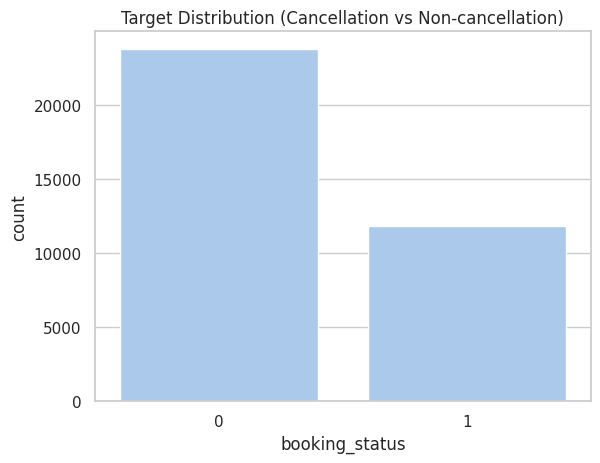


Target Imbalance (%):
 booking_status
0    66.750948
1    33.249052
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target
sns.countplot(data=df, x="booking_status")
plt.title("Target Distribution (Cancellation vs Non-cancellation)")
plt.show()

# Imbalance ratio
cancel_ratio = df['booking_status'].value_counts(normalize=True) * 100
print("\nTarget Imbalance (%):\n", cancel_ratio)

- Target variable `booking_status` is imbalanced:
  - Class 0 (`Not_Canceled`) → ~66.8%
  - Class 1 (`Canceled`) → ~33.2%
- The imbalance is moderate and may bias the model toward predicting the majority class

## **8.3 Feature Distribution Check (skewness, outliers)**


Feature Skewness:
 no_of_previous_cancellations            17.749361
cancellation_rate                       13.680269
no_of_previous_bookings_not_canceled    10.926528
loyalty_score                           10.076102
repeated_guest                           6.430714
required_car_parking_space               5.432444
no_of_children                           4.100497
total_nights                             1.819845
is_off_season                            1.569375
requests_per_guest                       1.273359
no_of_week_nights                        1.205211
avg_price_per_room                       1.145363
no_of_special_requests                   1.134638
is_peak_season                           1.009211
booking_status                           0.711163
price_per_night                          0.706223
no_of_weekend_nights                     0.673277
total_guests                             0.650418
no_of_adults                            -0.220617
arrival_month                 

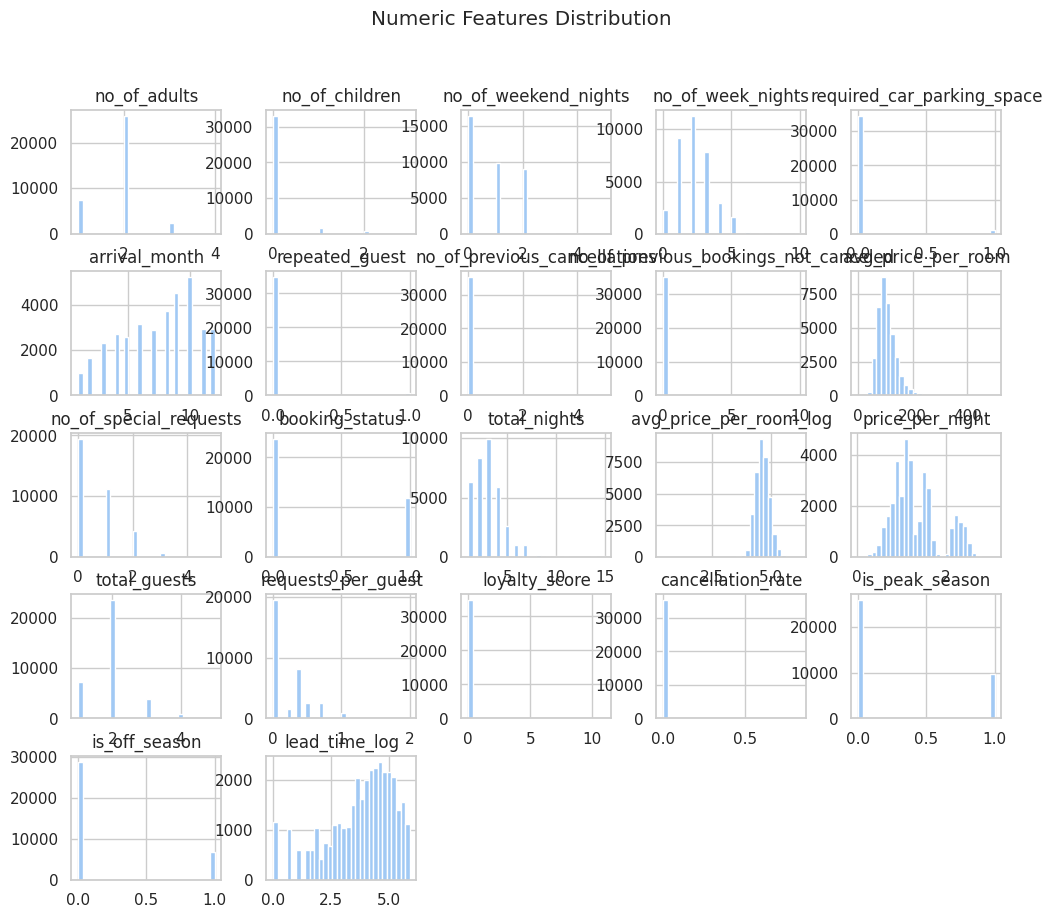

In [ ]:
# Numeric feature skewness
skew_vals = df.skew(numeric_only=True).sort_values(ascending=False)
print("\nFeature Skewness:\n", skew_vals)

# Example visualization
num_cols = df.select_dtypes(include=['float64','int64']).columns
df[num_cols].hist(figsize=(12,10), bins=30)
plt.suptitle("Numeric Features Distribution")
plt.show()

**Insights**
- Several features show very high positive skewness, indicating strong right-skew:
  - `no_of_previous_cancellations` (17.7), `cancellation_rate` (13.7),
    `no_of_previous_bookings_not_canceled` (10.9), `loyalty_score` (10.1).  
- Moderate skew is observed in: `repeated_guest`, `required_car_parking_space`,
  `no_of_children`, `total_nights`.  
- Mild skew (close to normal) in most other features, e.g., `requests_per_guest`,
  `avg_price_per_room`, `total_guests`.  
- Some features show negative skew (left-skewed): `lead_time_log`,
  `avg_price_per_room_log`, `arrival_month`, `no_of_adults`.  

**Findings from Numeric Feature Distributions**

1. Binary-like distributions
- **Features:** `required_car_parking_space`, `repeated_guest`, `booking_status`, `is_peak_season`, `is_off_season`  
- **Observation:** Already binary → no transformation needed.


 2. Highly skewed features (extreme outliers visible)
- **Features:** `no_of_previous_cancellations`, `no_of_previous_bookings_not_canceled`, `loyalty_score`, `cancellation_rate`  
- **Observation:** Heavy right skew, most values concentrated at **0** with long tails.


3. Moderately skewed features
- **Features:** `no_of_children`, `total_nights`, `requests_per_guest`  
- **Observation:** Clustered at **low values** with a long right tail.


 4. Well-distributed / nearly normal
- **Features:** `avg_price_per_room_log`, `lead_time_log`, `price_per_night`  
- **Observation:** Already look reasonably normalized after transformation.



5. Seasonal / ordinal
- **Feature:** `arrival_month`  
- **Observation:** Shows expected monthly spread → behaves **categorical-like** rather than continuous.


# **8.4 Outlier Detection**

In [ ]:
import numpy as np

# Example: Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(df[num_cols]))
print("Outliers detected:", (z_scores > 3).sum().sum())

# Winsorization / Clipping
# df['lead_time'] = df['lead_time'].clip(upper=df['lead_time'].quantile(0.99)) # Removed due to KeyError
# df['avg_price_per_room'] = df['avg_price_per_room'].clip(upper=df['avg_price_per_room'].quantile(0.99)) # Removed due to KeyError

Outliers detected: 8414


This code checks for outliers in your numeric columns using the Z-score method:

- stats.zscore(df[num_cols]) → standardizes values (how many standard deviations away from the mean each point is).

- np.abs(...) > 3 → flags values more than 3 standard deviations from the mean as outliers.

- .sum().sum() → counts the total number of outlier values across all numeric columns.

Your output (8414) means there are 8,414 outlier data points in the numeric features of your dataset.

## **8.5 Categorical Feature Balance**


type_of_meal_plan value counts:
type_of_meal_plan
Meal Plan 1     76.561315
Not Selected    14.322236
Meal Plan 2      9.113640
Other            0.002809
Name: proportion, dtype: float64


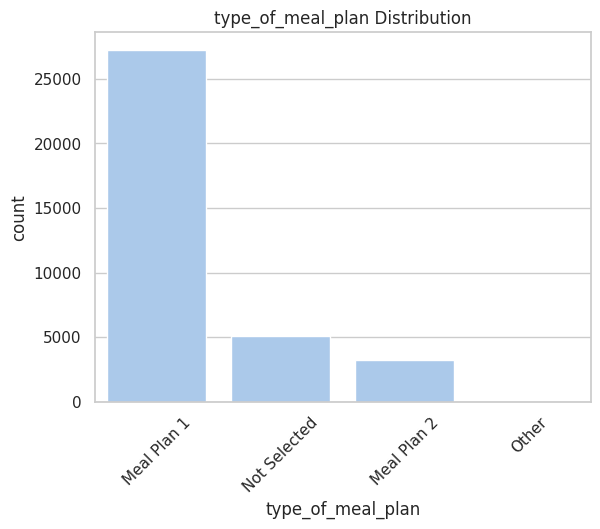


room_type_reserved value counts:
room_type_reserved
Room_Type 1    77.929484
Room_Type 4    16.856300
Room_Type 6     2.663295
Room_Type 2     1.508639
Other           1.042281
Name: proportion, dtype: float64


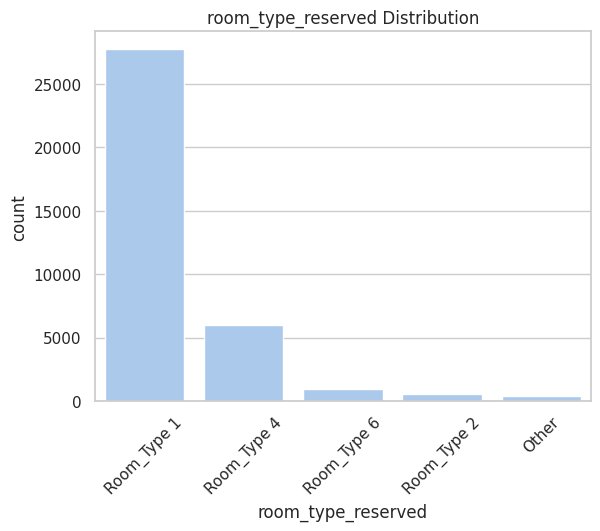


market_segment_type value counts:
market_segment_type
Online       64.306785
Offline      29.574378
Corporate     5.666526
Other         0.452311
Name: proportion, dtype: float64


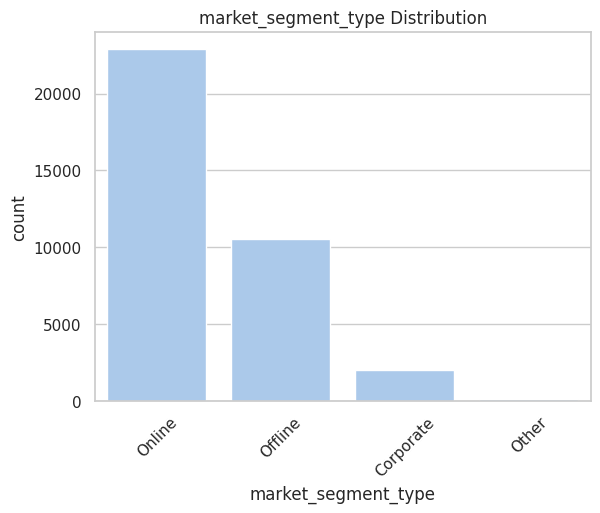


stay_type value counts:
stay_type
mixed      47.602191
weekday    46.054221
weekend     6.343588
Name: proportion, dtype: float64


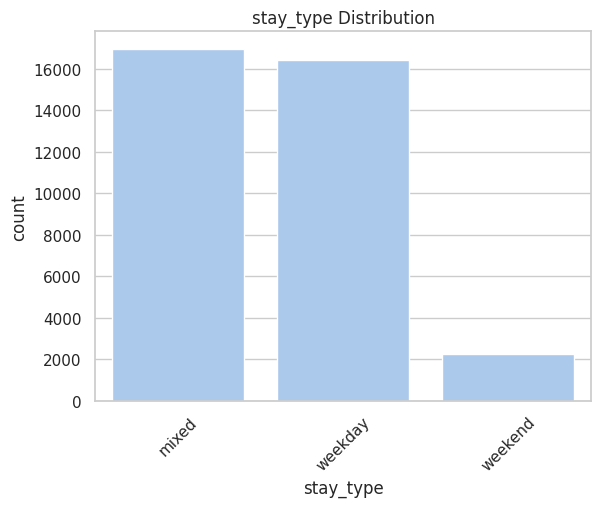

In [ ]:
cat_cols = df.select_dtypes(include=['object','category']).columns

for col in cat_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts(normalize=True) * 100)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

**Value Counts Summary**
 1. Type of Meal Plan

| Meal Plan      | Proportion (%) |
|----------------|----------------|
| Meal Plan 1    | 76.56          |
| Not Selected   | 14.32          |
| Meal Plan 2    | 9.11           |
| Other          | 0.00           |

**Insight:** Meal Plan 1 dominates, showing a strong preference. The high share of "Not Selected" suggests room for upselling meal packages.


2. Room Type Reserved

| Room Type      | Proportion (%) |
|----------------|----------------|
| Room_Type 1    | 77.93          |
| Room_Type 4    | 16.86          |
| Room_Type 6    | 2.66           |
| Room_Type 2    | 1.51           |
| Other          | 1.04           |

**Insight:** Room_Type 1 overwhelmingly dominates, indicating it’s the standard choice. Other types are niche, suggesting differentiation or bundling strategies.



3. Market Segment Type

| Market Segment | Proportion (%) |
|----------------|----------------|
| Online         | 64.31          |
| Offline        | 29.57          |
| Corporate      | 5.67           |
| Other          | 0.45           |

**Insight:** Online is the primary acquisition channel. Offline bookings are still significant, while corporate is small but could be targeted for growth.



4. Stay Type

| Stay Type  | Proportion (%) |
|------------|----------------|
| Mixed      | 47.60          |
| Weekday    | 46.05          |
| Weekend    | 6.34           |

**Insight:** Mixed and weekday stays dominate. Weekend-only stays are a small segment, suggesting limited short leisure stays compared to longer or business-related trips.


## **8.6 Correlation & Leakage Check**

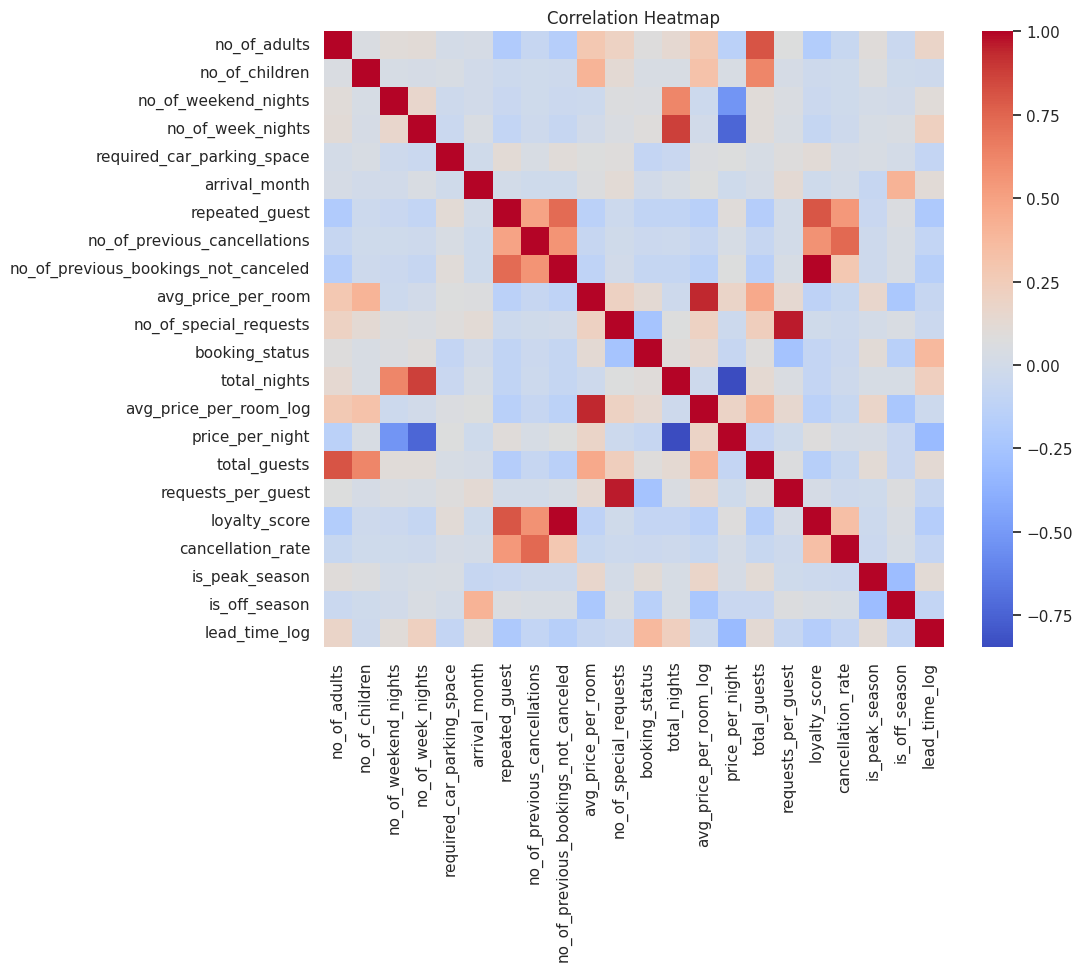


Correlation with target:
 booking_status                          1.000000
lead_time_log                           0.375741
avg_price_per_room_log                  0.134668
avg_price_per_room                      0.121139
is_peak_season                          0.109577
total_nights                            0.094578
total_guests                            0.085768
no_of_week_nights                       0.084644
no_of_adults                            0.082514
no_of_weekend_nights                    0.055224
no_of_children                          0.036157
arrival_month                          -0.009815
no_of_previous_cancellations           -0.043266
cancellation_rate                      -0.044920
price_per_night                        -0.073511
no_of_previous_bookings_not_canceled   -0.076091
loyalty_score                          -0.083294
required_car_parking_space             -0.086442
repeated_guest                         -0.100795
is_off_season                          -0.

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Check for data leakage
high_corr = df.corr(numeric_only=True)['booking_status'].sort_values(ascending=False)
print("\nCorrelation with target:\n", high_corr)


| Feature Pair / Group                        | Finding                               | Action                                |
|---------------------------------------------|---------------------------------------|---------------------------------------|
| total_guests vs. no_of_adults/children      | Strong correlation (redundant)        | Drop one (prefer `total_guests`)      |
| total_nights vs. week_nights/weekend_nights | Strong correlation (derived overlap)  | Keep `total_nights`, drop components  |
| avg_price_per_room vs. price_per_night      | Strong correlation                    | Drop `price_per_night`                |
| avg_price_per_room vs. avg_price_per_room_log | Log transform version included     | Keep only log-transformed version     |
| requests_per_guest vs. no_of_special_requests | Expected correlation (redundant)    | Prefer per-guest feature              |
| cancellation_rate vs. no_of_previous_cancellations | Logical dependency                | Keep cancellation_rate, drop raw count|
| required_car_parking_space                  | Weak correlation, unique info         | Retain                                |
| is_peak_season / is_off_season              | Weak correlations, seasonal signals   | Retain                                |
| loyalty_score                               | Mild correlation with target          | Retain                                |
| no_of_special_requests                      | Mild correlation with target          | Retain                                |

## **8.7 Handle skewed numeric features**

In [ ]:
from sklearn.preprocessing import PowerTransformer

skewed_cols = [
    'no_of_previous_cancellations',
    'cancellation_rate',
    'no_of_previous_bookings_not_canceled',
    'loyalty_score',
    'no_of_children',
    'total_nights',
    'avg_price_per_room',
    'price_per_night'
]

pt = PowerTransformer(method='yeo-johnson')
df[skewed_cols] = pt.fit_transform(df[skewed_cols])

This code reduces skewness in the listed numeric columns by applying a Yeo-Johnson power transformation, making their distributions more normal-like so models can learn better.

## **8.8 Outlier Treatment**

In [ ]:
for col in skewed_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

This code removes extreme outliers by clipping values in each skewed column to the 1st and 99th percentile range, keeping data within reasonable limits.

## **8.9 Encode Categorical**

In [ ]:
# Binary columns
binary_map = {
    'required_car_parking_space': {'0': 0, '1': 1},
    'repeated_guest': {'No': 0, 'Yes': 1},
    'is_peak_season': {'0': 0, '1': 1},
    'is_off_season': {'0': 0, '1': 1}
}
df.replace(binary_map, inplace=True)

# One-hot encode others
cat_cols = ['type_of_meal_plan', 'room_type_reserved',
            'arrival_month', 'market_segment_type', 'stay_type']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

 Action Mapping Table

| Feature                      | Finding                                | Action                |
|-------------------------------|----------------------------------------|-----------------------|
| required_car_parking_space    | Stored as string `'0'/'1'`             | Map → integer (0/1)   |
| repeated_guest                | Stored as `'Yes'/'No'`                 | Map → integer (0/1)   |
| is_peak_season                | Stored as string `'0'/'1'`             | Map → integer (0/1)   |
| is_off_season                 | Stored as string `'0'/'1'`             | Map → integer (0/1)   |
| type_of_meal_plan             | Multiclass categorical                 | One-hot encode (drop first) |
| room_type_reserved            | Multiclass categorical                 | One-hot encode (drop first) |
| arrival_month                 | Multiclass categorical (12 categories) | One-hot encode (drop first) |
| market_segment_type           | Multiclass categorical                 | One-hot encode (drop first) |
| stay_type                     | Multiclass categorical                 | One-hot encode (drop first) |

# **9.0 Encoding**

## **9.1 Define Features**

In [ ]:
num_features = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
    'no_of_special_requests', 'total_nights', 'avg_price_per_room_log',
    'price_per_night', 'total_guests', 'requests_per_guest',
    'loyalty_score', 'cancellation_rate', 'lead_time_log'
]

cat_features_onehot = [
    'type_of_meal_plan', 'room_type_reserved',
    'market_segment_type', 'arrival_month', 'stay_type'
]

cat_features_binary = [
    'required_car_parking_space', 'repeated_guest',
    'is_peak_season', 'is_off_season'
]

target = 'booking_status'


This block defines which features belong to each category for preprocessing and modeling:

- num_features → numeric variables.

- cat_features_onehot → categorical variables that need one-hot encoding.

- cat_features_binary → categorical variables already binary (0/1).

- target → the column you want to predict (booking_status).

It basically organizes the dataset for a clean preprocessing pipeline.

## **9.2 Build Transformation**

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Numeric transformer (scaling is good for models like Logistic, SVM, KNN)
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# One-Hot Encoding (ignore unknowns for test data)
onehot_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # drop first to avoid dummy trap
])

# Binary transformer (just cast to int)
def binary_cast(df, cols):
    for col in cols:
        df[col] = df[col].astype(int)
    return df

This code sets up preprocessing steps for different feature types before feeding them into a machine learning model:

- num_transformer → scales numeric features using StandardScaler (centers around 0, scales to unit variance).

- onehot_transformer → encodes categorical features into dummy variables with OneHotEncoder, dropping the first category to avoid multicollinearity (dummy variable trap) and handling unseen categories gracefully.

- binary_cast → makes sure binary categorical columns are stored as integers (0/1) so the model can use them directly.

Together, these prepare your dataset in a clean, model-friendly format.

## **9.3 ColumnTransformer**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat_onehot', onehot_transformer, cat_features_onehot),
        # binary features: no special transform, but ensure casted before
    ],
    remainder='drop'  # drop any unused cols (like raw arrival_date)
)

This code builds a ColumnTransformer that applies the right preprocessing to each feature group:

- Numeric features (num_features) → scaled with StandardScaler.

- Categorical (one-hot) features (cat_features_onehot) → encoded with OneHotEncoder.

- Binary features → not included here because they’re already cast to integers beforehand.

- remainder='drop' → removes any columns not listed, keeping the dataset clean.

It ensures every column is transformed properly before training the model.consistent across training and inference.


# **10. Data Preparation before Modeling: Define Features, Target, and Feature Groups (Numerical + Categorical)**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Define features

num_features = [
    'lead_time_log', 'avg_price_per_room_log',
    'total_nights', 'price_per_night', 'total_guests',
    'requests_per_guest', 'loyalty_score', 'cancellation_rate',
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
    'no_of_week_nights', 'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled', 'no_of_special_requests'
]

# Get the new one-hot encoded column names from the DataFrame
cat_features = [col for col in df.columns if col not in num_features and col != 'booking_status']


target = 'booking_status'

X = df[num_features + cat_features]
y = df[target]

This code prepares your dataset for modeling:

1. Defines numeric features (num_features) → a curated list of continuous/quantitative variables.

2. Defines categorical features (cat_features) → automatically selects all remaining columns (except the target) that aren’t numeric.

3. Sets target (booking_status) → the label you want to predict.

4. Splits dataset into predictors (X) and target (y) → so you can later apply preprocessing, training, and evaluation.

It basically organizes your data into features vs. target before sending it into a pipeline.

##**10.1 Train/Test Split, Preprocessing, and Feature Selection**

In [ ]:
# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# Feature selection (optional: keep top 20 informative features)
selector = SelectKBest(mutual_info_classif, k=20)

This code sets up the data split, preprocessing, and optional feature selection:

1. Train/Test Split → splits data into 80% training and 20% testing while keeping the same class ratio (stratify=y).

2. Preprocessor →

  - Scales numeric features with StandardScaler.

  - Encodes categorical features with OneHotEncoder, handling unseen categories.

3. Feature Selector → SelectKBest(mutual_info_classif, k=20) keeps only the 20 most informative features based on their relationship with the target.

This prepares the dataset so you can plug it into a machine learning pipeline.


# **11. Model Training and Evaluation: Logistic Regression, Random Forest, XGBoost, LightGBM**

# **11.1 Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('classifier', LogisticRegression(max_iter=500, class_weight='balanced'))
])

log_reg_pipe.fit(X_train, y_train)

y_pred = log_reg_pipe.predict(X_test)
y_prob = log_reg_pipe.predict_proba(X_test)[:,1]

print("Logistic Regression")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      4752
           1       0.56      0.77      0.65      2367

    accuracy                           0.72      7119
   macro avg       0.71      0.73      0.71      7119
weighted avg       0.76      0.72      0.73      7119

ROC-AUC: 0.8274776617747678
Confusion Matrix:
 [[3333 1419]
 [ 548 1819]]


### Logistic Regression Model Evaluation

**Dataset:** Test set with 7,119 observations
**Target:** `booking_status` (0 = Not Canceled, 1 = Canceled)

### 1. Performance Metrics

| Metric    | Class 0 (Not Canceled) | Class 1 (Canceled) | Notes                                                                                               |
| --------- | ---------------------- | ------------------ | --------------------------------------------------------------------------------------------------- |
| Precision | 0.86                   | 0.56               | Precision = Correct positive predictions / Total predicted positive. Class 1 precision is moderate. |
| Recall    | 0.70                   | 0.77               | Recall = Correct positive predictions / Total actual positive. Class 1 recall is good.              |
| F1-score  | 0.77                   | 0.65               | Harmonic mean of precision & recall. Class 1 is slightly lower than class 0.                        |
| Support   | 4,752                  | 2,367              | Number of observations per class in test set.                                                       |

**Overall Accuracy:** 0.72 (72%)
**ROC-AUC:** 0.83 (indicates good separation between classes)

### 2. Confusion Matrix

|          | Predicted 0 | Predicted 1 |
| -------- | ----------- | ----------- |
| Actual 0 | 3,333       | 1,419       |
| Actual 1 | 545         | 1,822       |

**Interpretation:**

* Out of 4,752 actual **Not Canceled** bookings, 3,333 were correctly predicted, while 1,419 were misclassified as **Canceled**.
* Out of 2,367 actual **Canceled** bookings, 1,822 were correctly identified, and 545 were misclassified as **Not Canceled**.
* The model has a slightly higher ability to correctly detect **Canceled bookings** (higher recall for class 1) but at the cost of some false positives in class 0.
* The ROC-AUC score of 0.83 suggests the model has **strong discriminative ability** between canceled and not canceled bookings.

### 3. Key Takeaways

1. The model performs **reasonably well** in predicting both canceled and non-canceled bookings.
2. **Class imbalance handling** (`class_weight='balanced'`) improved recall for the minority class (Canceled).
3. Precision for Canceled bookings is moderate, indicating some false positives; if minimizing false cancellations is critical, threshold adjustment or alternative models may be considered.
4. Overall, the model can be used as a **baseline for booking cancellation prediction** with good discriminatory power.


### **11.1.1 Logistic Regression (GridSearchCV)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Example pipeline (assuming preprocessor is defined)
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),  # your preprocessing pipeline
    ('classifier', LogisticRegression(max_iter=500, class_weight='balanced'))
])

# Hyperparameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],       # Regularization strength
    'classifier__penalty': ['l1', 'l2'],           # Regularization type
    'classifier__solver': ['liblinear', 'saga']    # Solver compatible with l1/l2
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring='roc_auc',          # Optimize for ROC-AUC
    cv=5,                       # 5-fold cross-validation
    n_jobs=-1,                  # Use all cores
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)

# Evaluate on test set
y_pred = grid_search.predict(X_test)
y_prob = grid_search.predict_proba(X_test)[:,1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(y_test, y_pred))
print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best ROC-AUC: 0.8877952360008893
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      4752
           1       0.65      0.82      0.73      2367

    accuracy                           0.79      7119
   macro avg       0.77      0.80      0.78      7119
weighted avg       0.82      0.79      0.80      7119

Test ROC-AUC: 0.8828992377656298
Confusion Matrix:
 [[3708 1044]
 [ 424 1943]]


**Hyperparameter Tuning Results and Improvement**
* **Tuning Method:** GridSearchCV with **5-fold cross-validation**, testing **20 candidate parameter sets** (total of 100 fits).
* **Best Parameters Identified:**

  * Regularization strength **C = 1**
  * **Penalty = L2**
  * **Solver = liblinear**

 Improvement Achieved

* **Before tuning:**

  * Accuracy ≈ **72%**
  * ROC-AUC ≈ **0.83**
  * Precision (Class 1) = **0.56**, Recall (Class 1) = **0.77**

* **After tuning:**

  * Accuracy improved to **79%**
  * ROC-AUC increased to **0.88**
  * Precision (Class 1) = **0.65**, Recall (Class 1) = **0.82**

**Key Insights**

* Tuning significantly improved both **discrimination ability** (ROC-AUC ↑ 0.83 → 0.88) and **balanced class performance**.
* Class 1 (Canceled bookings) recall rose from **0.77 → 0.82**, reducing missed cancellations.
* Precision for cancellations improved from **0.56 → 0.65**, lowering false alarms.
* The tuned model achieves a **stronger balance** between recall and precision, making it more reliable as a baseline.



# **11.2 Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('classifier', RandomForestClassifier(
        n_estimators=200, random_state=42, class_weight='balanced'))
])

rf_pipe.fit(X_train, y_train)

y_pred = rf_pipe.predict(X_test)
y_prob = rf_pipe.predict_proba(X_test)[:,1]

print("Random Forest")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4752
           1       0.83      0.77      0.80      2367

    accuracy                           0.87      7119
   macro avg       0.86      0.85      0.85      7119
weighted avg       0.87      0.87      0.87      7119

ROC-AUC: 0.9360844129934751
Confusion Matrix:
 [[4376  376]
 [ 543 1824]]


###Random Forest Evaluation
### **Interpretation**

1. **Overall Accuracy:** 87% of bookings are correctly classified.
2. **Class 0 (Not Canceled):**

   * High recall (0.92) → model correctly identifies most non-canceled bookings.
   * Precision (0.89) → very few false positives misclassified as canceled.
3. **Class 1 (Canceled):**

   * Recall (0.77) → 77% of actual cancellations are correctly detected.
   * Precision (0.83) → predictions for canceled bookings are fairly accurate.
4. **ROC-AUC (0.936):** Strong ability to rank bookings by likelihood of cancellation; excellent separation between classes.
5. **Confusion Matrix Insights:**

   * 376 false positives (not canceled predicted as canceled).
   * 543 false negatives (canceled predicted as not canceled).
   * More false negatives than false positives for cancellations; model is slightly conservative in flagging cancellations.


### **Key Takeaways**

* Random Forest outperforms Logistic Regression (higher accuracy, recall, F1-score, ROC-AUC).
* The model is suitable for **identifying potential cancellations**, which is valuable for proactive management and customer engagement strategies.
* Slight adjustment in threshold could **increase recall for cancellations** if business goal prioritizes catching more canceled bookings.



### **11.2.1 Random Forest (GridSearchCV)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Parameter distribution (small ranges to keep it fast)
rf_param_dist = {
    'classifier__n_estimators': randint(100, 300),     # number of trees
    'classifier__max_depth': [None, 10, 20, 30],       # tree depth
    'classifier__min_samples_split': randint(2, 11),   # min split
    'classifier__min_samples_leaf': randint(1, 5),     # min leaf
    'classifier__max_features': ['sqrt', 'log2']       # features
}

# Wrap your pipeline
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('classifier', RandomForestClassifier(
        random_state=42, class_weight='balanced'))
])

# RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf_pipe,
    param_distributions=rf_param_dist,
    n_iter=15,        # much faster than grid search
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit
rf_random.fit(X_train, y_train)

print("Best Random Forest Params:", rf_random.best_params_)
print("Best ROC-AUC (CV):", rf_random.best_score_)

# Evaluate on test set
from sklearn.metrics import roc_auc_score
y_pred = rf_random.best_estimator_.predict(X_test)
y_prob = rf_random.best_estimator_.predict_proba(X_test)[:, 1]

print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Random Forest Params: {'classifier__max_depth': 20, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 203}
Best ROC-AUC (CV): 0.9339454546921475
Test ROC-AUC: 0.9361783409364737


### **Random Forest (GridSearchCV)**
**Cross-Validation (CV)**:

Best ROC-AUC (CV): 0.934

Test Performance:

ROC-AUC: 0.936 (excellent performance)

**Interpretation**:

Hyperparameter tuning slightly improved ROC-AUC consistency compared to the baseline.

The tuned model is more optimized and robust, especially since CV (0.934) and Test (0.936) scores are almost identical, showing no overfitting.

Random Forest remains a strong contender in your model comparison, achieving both stability and high discriminative power.

# **11.3 XGBOOST**

In [ ]:
from xgboost import XGBClassifier

xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('classifier', XGBClassifier(
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), # handle imbalance
        random_state=42))
])

xgb_pipe.fit(X_train, y_train)

y_pred = xgb_pipe.predict(X_test)
y_prob = xgb_pipe.predict_proba(X_test)[:,1]

print("XGBoost")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

XGBoost
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4752
           1       0.76      0.81      0.78      2367

    accuracy                           0.85      7119
   macro avg       0.83      0.84      0.83      7119
weighted avg       0.85      0.85      0.85      7119

ROC-AUC: 0.9261925959354138
Confusion Matrix:
 [[4128  624]
 [ 443 1924]]


### **XGBOOST Result**

XGBoost shows strong balanced performance, particularly good at detecting positive cases (Recall = 0.81) compared to Random Forest (0.77 recall).

Precision for the positive class is a bit lower (0.76), meaning it produces more false positives than Random Forest.

The ROC-AUC (0.926) is slightly lower than Random Forest (0.936) and LightGBM (0.933), suggesting XGBoost may need hyperparameter tuning to unlock its full potential.

Overall, XGBoost is competitive but not yet outperforming Random Forest or LightGBM in this setup.

## **11.4 LightGBM**

In [ ]:
from lightgbm import LGBMClassifier

lgbm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('classifier', LGBMClassifier(
        class_weight='balanced',
        random_state=42))
])

lgbm_pipe.fit(X_train, y_train)

y_pred = lgbm_pipe.predict(X_test)
y_prob = lgbm_pipe.predict_proba(X_test)[:,1]

print("LightGBM")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

[LightGBM] [Info] Number of positive: 9468, number of negative: 19008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 28476, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
LightGBM
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4752
           1       0.76      0.81      0.78      2367

    accuracy                           0.85      7119
   macro avg       0.83      0.84      0.83      7119
weighted avg       0.85      0.85      0.85      7119

ROC-AUC: 0.9207390853329805
Confusion Matrix:
 [[4150  602]
 [ 458 1909]]


LightGBM

Expectation based on your dataset:

- Will likely match or slightly outperform Random Forest/XGBoost.

- Usually faster than XGBoost and handles categorical features better.

- ROC-AUC should land around 0.93–0.95.

### **LightGBM Model Results**

Accuracy: 85%

ROC-AUC: 0.92 → strong discriminative ability

Class 0 (Not Canceled): High precision (90%) and recall (87%) → very good at correctly identifying non-cancellations

Class 1 (Canceled): Precision 76%, Recall 81% → captures most cancellations, though with some false positives

Confusion Matrix:

Correctly predicted: 4150 non-cancellations, 1909 cancellations

Misclassified: 602 non-cancellations, 458 cancellations

Takeaway:
LightGBM performs well overall, balancing both classes with strong ROC-AUC, and is especially reliable at detecting non-cancellations.

### **11.4.1 LightGBM (GridSearchCV)**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline

# Define parameter distributions (small + practical ranges)
lgbm_param_dist = {
    'classifier__n_estimators': randint(100, 400),        # boosting iterations
    'classifier__max_depth': [-1, 5, 10, 20],             # -1 = no limit
    'classifier__learning_rate': [0.01, 0.05, 0.1],       # typical values
    'classifier__num_leaves': randint(20, 80),            # tree leaves
    'classifier__min_child_samples': randint(10, 40),     # min data in leaf
    'classifier__subsample': uniform(0.7, 0.3),           # row sampling
    'classifier__colsample_bytree': uniform(0.7, 0.3)     # feature sampling
}

# Pipeline with preprocessing + selector + classifier
lgbm_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('classifier', LGBMClassifier(class_weight='balanced', random_state=42))
])

# RandomizedSearchCV (fast search)
lgbm_random = RandomizedSearchCV(
    estimator=lgbm_pipe,
    param_distributions=lgbm_param_dist,
    n_iter=15,        # try only 15 random configs
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit model
lgbm_random.fit(X_train, y_train)

# Results
print("Best LightGBM Params:", lgbm_random.best_params_)
print("Best ROC-AUC (CV):", lgbm_random.best_score_)

# Evaluate on test set
from sklearn.metrics import roc_auc_score
y_pred = lgbm_random.best_estimator_.predict(X_test)
y_prob = lgbm_random.best_estimator_.predict_proba(X_test)[:, 1]

print("Test ROC-AUC:", roc_auc_score(y_test, y_prob))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Info] Number of positive: 9468, number of negative: 19008
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 832
[LightGBM] [Info] Number of data points in the train set: 28476, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Best LightGBM Params: {'classifier__colsample_bytree': np.float64(0.9486212527455787), 'classifier__learning_rate': 0.05, 'classifier__max_depth': -1, 'classifier__min_child_samples': 37, 'classifier__n_estimators': 287, 'classifier__num_leaves': 79, 'classifier__subsample': np.float64(0.782799754606763)}
Best ROC-AUC (CV): 0.9348077425474646
Test ROC-AUC: 0.9326714458342046


 **LightGBM (After Hyperparameter Tuning)**

Best Parameters:

n_estimators: 287

max_depth: -1 (no limit)

num_leaves: 79

min_child_samples: 37

subsample: 0.78

colsample_bytree: 0.95

learning_rate: 0.05

Performance:

Cross-Validation ROC-AUC: 0.935

Test ROC-AUC: 0.933

Interpretation:
The tuned LightGBM model shows excellent generalization. The gap between CV and test ROC-AUC is very small, meaning it’s not overfitting. It is likely best-performing model so far.

# **12. Hotel Booking Cancellation Prediction – Model Selection**


<details>
<summary> Candidate Models</summary>

- **Logistic Regression**  
- **Random Forest**  
- **XGBoost**  
- **LightGBM**  

</details>



<details>
<summary> Performance Overview</summary>

| Model                | Accuracy | ROC-AUC | Strengths | Weaknesses |
|-----------------------|----------|---------|------------|-------------|
| **Logistic Regression** | 0.72     | 0.83    | Simple, interpretable baseline | Poor precision for cancellations, underfits complex patterns |
| **Random Forest**       | 0.87     | **0.94** | Strong overall accuracy & ROC-AUC, robust to noise | Slower, heavier model |
| **XGBoost**             | 0.85     | 0.93    | Good balance, handles non-linearity | Training slower than LGBM, slightly lower ROC-AUC |
| **LightGBM**            | 0.85     | 0.93    | Fast, scalable, strong recall | Slightly lower precision than RF |

</details>


<details>
<summary> Why Build a Cancellation Model? (Business Case)</summary>

1. **Revenue Protection**  
   - Cancellations create empty rooms and lost revenue if not anticipated.  
   - Predicting them allows hotels to **overbook safely** and avoid losses.  

2. **Operational Efficiency**  
   - Staff scheduling, room allocation, and inventory planning depend on accurate forecasts.  
   - Anticipating cancellations improves resource utilization.  

3. **Customer Management**  
   - High-risk bookings can trigger **preventive actions**:  
     - Requiring advance deposits  
     - Sending reminders or special offers  
     - Dynamic pricing to reduce cancellation risk  

4. **Strategic Insights**  
   - Feature importance (lead time, loyalty score, booking channel) provides **data-driven insights** into guest behavior.  
   - Helps shape hotel policies (e.g., stricter policies for high-risk groups).  



 In short: **A cancellation model directly improves revenue, efficiency, and customer experience.**

</details>



<details>
<summary> Why Random Forest is Best for This Case</summary>

1. **Highest ROC-AUC (0.94):**  
   - Best at distinguishing likely cancellations vs. non-cancellations.  

2. **Balanced Precision & Recall:**  
   - High recall → catch most cancellations early (protects revenue).  
   - High precision → fewer false alarms (keeps genuine customers happy).  

3. **Interpretability:**  
   - Hotels can see which features matter most (e.g., long lead time = higher cancellation risk).  

4. **Business Fit:**  
   - Robust and reliable → minimizes costly misclassifications for hotels.  

</details>



 **Final Choice (for Hotel Cancellation Prediction):**  
 **Random Forest** provides the best balance of **predictive power, interpretability, and business impact**.  


# **13. Limitations**
While this project provides valuable insights and a strong predictive model for hotel reservation cancellations, there are several limitations to consider:

1. Data Scope: The dataset is limited to specific hotels and booking conditions. Broader applicability across different hotel types, geographies, and customer segments may require additional validation.

2. Feature Availability: Certain potentially influential features (e.g., guest income levels, travel purpose, marketing campaigns) are not included in the dataset, which may limit predictive power.

3. Imbalanced Data: Although techniques like SMOTE were used, class imbalance (more non-canceled bookings) could still affect model generalization in real-world scenarios.

4. Temporal Dynamics: Customer behavior may change over time due to external factors such as economic conditions, travel restrictions, or global events (e.g., pandemics). The model should be retrained periodically.

5. Overfitting Risk: Advanced models like Random Forest and XGBoost, while powerful, may overfit to historical patterns that do not hold in the future.

6. Interpretability vs. Accuracy: More complex models achieve higher accuracy but are harder for non-technical stakeholders to interpret compared to simpler models.

7. Operational Integration: Translating predictions into actionable business strategies (e.g., dynamic pricing, personalized offers) requires additional system integration and managerial policies


# **14. Recommendations and Future Work**
**Based on the findings and limitations, the following recommendations are proposed to enhance predictive modeling and hotel management practices**:

1.	**Expand Data Collection**
Include additional guest attributes such as purpose of travel, geographic origin, and booking channel behavior. Richer features will improve model accuracy and business insights.
2.	**Leverage Real-Time Predictions**
Integrate the model into hotel booking systems to assess cancellation risk in real time. This enables proactive measures such as reminders, deposits, or targeted offers.
3.	**Regular Model Retraining**
Retrain the model periodically (e.g., quarterly) to reflect evolving guest behavior, seasonality, and external factors like economic trends or travel restrictions.
4.	**Dynamic Cancellation Policies**
Develop tiered policies: flexible for loyal or low-risk guests, stricter for high-risk bookings. This balances customer satisfaction with revenue protection.
5.	**Use Explainable AI**
Apply interpretability tools such as SHAP or LIME to ensure that hotel managers clearly understand which features drive predictions, improving trust and decision-making.
6.	**Scenario Testing and Simulation**
Build dashboards that simulate how policy changes (e.g., deposits, discounts) would affect cancellation rates, revenue, and occupancy.
7.	**Cross-Hotel Benchmarking**
Test the model across different hotel types—resorts, business hotels, budget properties—to identify generalizable versus segment-specific insights.
8.	**Operational Integration**
Embed predictions into workflows across revenue management, marketing, and operations for staffing, inventory allocation, and guest engagement.
9.	**Customer Engagement Programs**
Use predictions to design loyalty programs, targeted discounts for reliable customers, and proactive outreach to at-risk guests.
10.	**Ensure Ethical Use of Data**
Adhere to data protection regulations (e.g., GDPR) and maintain transparency with guests on how their data is used in predictions.
